# Part 1:


<span style='color:darkblue'> Questions 1, 2:  </span>


In [354]:
import pandas as pd
import matplotlib.pyplot as plt
d=pd.read_excel('C:/Users/EMERTAT/Downloads/gozaresh.xlsx')
d

,#,تاریخ,زمان,نیاز مصرف برق در پیک,نیاز مصرف برق در پیک (سال گذشته),ذخیره نیروگاه ها,مصرف برق صنایع,تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت),میانگین فرکانس
0,1,1400/11/17,18:41,41666.0,36826.0,991,"5,045",3920,49.93
1,2,1400/11/17,12:34,39126.0,34105.0,"1,694","4,564",3920,49.93
2,3,1400/11/16,18:46,41165.0,38563.0,245,"5,044",4615,49.91
3,4,1400/11/16,11:45,39032.0,37097.0,628,"4,967",4615,49.91
4,5,1400/11/15,19:00,37405.0,39934.0,570,"4,931",3793,49.93
...,...,...,...,...,...,...,...,...,...
3519,3520,1396/01/02,12:09,22818.0,NaN,"4,740","3,599",0,50.00
3520,3521,1396/01/01,19:53,26416.0,NaN,"3,140","3,639",0,50.00
3521,3522,1396/01/01,12:26,22068.0,NaN,"4,690","3,632",0,50.00
3522,3523,1395/12/30,19:53,26639.0,NaN,"5,671","3,908",0,50.00


<span style='color:olive'> دیتا را فراخوانی کرده ایم  </span>

<span style='color:darkblue'> Question 3:  </span>


In [355]:
d.columns.tolist()

['#',
 'تاریخ',
 'زمان',
 'نیاز مصرف برق در پیک',
 'نیاز مصرف برق در پیک (سال گذشته)',
 'ذخیره نیروگاه ها',
 'مصرف برق صنایع',
 'تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)',
 'میانگین فرکانس']

<span style='color:olive'> ابتدا نام ستون ها را پیدا میکنیم و بعد از آن تغییر نام میدهیم ستون ها را  </span>



In [356]:
d=d.rename(columns={"تاریخ":'date','زمان':'time','ذخیره نیروگاه ها':'p_reserve','مصرف برق صنایع':'p_industries',
                  'نیاز مصرف برق در پیک (سال گذشته)':'p_lastyear','تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)':'p_renewable'
                 ,'میانگین فرکانس':'freq_avg','#':'r','نیاز مصرف برق در پیک':'p'})

<span style='color:olive'> نام ستون ها را تغییر داده ایم  </span>

In [357]:
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg
0,1,1400/11/17,18:41,41666.0,36826.0,991,"5,045",3920,49.93
1,2,1400/11/17,12:34,39126.0,34105.0,"1,694","4,564",3920,49.93
2,3,1400/11/16,18:46,41165.0,38563.0,245,"5,044",4615,49.91
3,4,1400/11/16,11:45,39032.0,37097.0,628,"4,967",4615,49.91
4,5,1400/11/15,19:00,37405.0,39934.0,570,"4,931",3793,49.93
...,...,...,...,...,...,...,...,...,...
3519,3520,1396/01/02,12:09,22818.0,NaN,"4,740","3,599",0,50.00
3520,3521,1396/01/01,19:53,26416.0,NaN,"3,140","3,639",0,50.00
3521,3522,1396/01/01,12:26,22068.0,NaN,"4,690","3,632",0,50.00
3522,3523,1395/12/30,19:53,26639.0,NaN,"5,671","3,908",0,50.00


<span style='color:olive'>برای اطمینان از صحت کار  </span>

<span style='color:darkblue'> Question 4:  </span>


In [358]:
def to_int(s):
    return int(s.replace(',',''))

<span style='color:olive'>این تابع علامت ',' را حذف میکند از رشته ی داده شده و سپس آن را به عدد تبدیل میکند  </span>

In [359]:
d['p_industries']=d['p_industries'].apply(to_int)
d['p_reserve']=d['p_reserve'].apply(to_int)


<span style='color:olive'> برای تبدیل رشته های مصرف برق صنایع و ذخیره نیروگاه ها باید ابتدا علایم اضافی را حذف کرد  </span>



In [360]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r             3524 non-null   int64  
 1   date          3524 non-null   object 
 2   time          3524 non-null   object 
 3   p             3520 non-null   float64
 4   p_lastyear    2760 non-null   float64
 5   p_reserve     3524 non-null   int64  
 6   p_industries  3524 non-null   int64  
 7   p_renewable   3524 non-null   int64  
 8   freq_avg      3524 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 247.9+ KB


<span style='color:olive'> همان طور که مشخص است داده های ستون دوم و سوم رشته و بقیه عدد هستند  </span>


**********************************************

# Part 2:

<span style='color:darkblue'> Questions 1, 2, 3:  </span>

In [361]:
d['y']=d.date.str[0:4].astype(int)
d['m']=d.date.str[5:7].astype(int)
d['d']=d.date.str[8:10].astype(int)
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1
3521,3522,1396/01/01,12:26,22068.0,NaN,4690,3632,0,50.00,1396,1,1
3522,3523,1395/12/30,19:53,26639.0,NaN,5671,3908,0,50.00,1395,12,30


<span style='color:olive'>  سال، ماه و روز را از هر دیتا استخراج میکنیم و در ستون های جدیدی این مقادیر را تخصیص میدهیم  </span>


<span style='color:darkblue'> Question 4:  </span>

In [362]:
def m_days(m):
    if m>6:
        return ((m-7)*30+(6)*31)
    else:
        return (m-1)*30

<span style='color:olive'> این تابع به این صورت عمل میکند که ماه را به عنوان ورودی دریافت میکند. سپس با توجه به اینکه جز شش ماه اول سال است و یا شش ماه اخر سال، تعداد روز هایی که در ماه های قبلی گذرانده را برمیگرداند  </span>

In [363]:
d['n_days']=d.m.apply(m_days)+d.d

<span style='color:olive'> حال ستون جدیدی (مطابق خواسته سوال) ایجاد میکنیم و تهداد روزا های گذرانده در ماه های قبل را با روز در همان ماه جمع میزنیم. نتیجه نهایی تعتداد روز های گذشته از اول سال تا به روز داده شده است  </span>

In [364]:
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1
3521,3522,1396/01/01,12:26,22068.0,NaN,4690,3632,0,50.00,1396,1,1,1
3522,3523,1395/12/30,19:53,26639.0,NaN,5671,3908,0,50.00,1395,12,30,366


<span style='color:olive'> برای اطمینان از صحت کار </span>


<span style='color:darkblue'> Question 5:  </span>

In [365]:
d['date_num']=d.y+(d.n_days/366.1).round(3)

 <span style='color:olive'> در این قسمت تاریخ عددی را طبق توضیحات داده شده در سوال حساب کرده ایم و سپس در ستونی جدید از دیتافریم قرار داده ایم  </span>


In [366]:
d[(d.date=='1399/12/29')|(d.date=='1398/08/06')|(d.date=='1400/01/01')]

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num
636,637,1400/01/01,19:03,33107.0,29732.0,1412,5395,3492,50.0,1400,1,1,1,1400.003
637,638,1400/01/01,12:16,29227.0,25334.0,2775,5029,3492,50.0,1400,1,1,1,1400.003
640,641,1399/12/29,19:02,35712.0,32169.0,1611,5665,0,50.0,1399,12,29,365,1399.997
641,642,1399/12/29,12:14,32239.0,27894.0,1986,5305,0,50.0,1399,12,29,365,1399.997
1638,1639,1398/08/06,18:44,35981.0,35049.0,5338,4490,1628,50.0,1398,8,6,222,1398.606
1639,1640,1398/08/06,11:51,33775.0,32247.0,4858,4190,1628,50.0,1398,8,6,222,1398.606


<span style='color:olive'> برای اطمینان از درستی محاسبات  </span>

<span style='color:darkblue'> Question 6:  </span>

In [367]:
d['h']=d.time.str[0:2].astype('int64')

<span style='color:olive'> در این قسمت ساعت را از قسمتی از زمان داده شده استخراج کرده ایم ودر ستون جدیدی قرار داده ایم  </span>


In [368]:
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323,1400.882,18
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322,1400.880,18
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321,1400.877,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1,1396.003,19
3521,3522,1396/01/01,12:26,22068.0,NaN,4690,3632,0,50.00,1396,1,1,1,1396.003,12
3522,3523,1395/12/30,19:53,26639.0,NaN,5671,3908,0,50.00,1395,12,30,366,1396.000,19


<span style='color:olive'> برای چک کردن دیتافریم </span>


***

# Part 3:

<span style='color:darkblue'> Question 1:  </span>

In [369]:
(d[d.columns.tolist()[1:]].notnull().sum()*100/d.shape[0]//1)

date            100.0
time            100.0
p                99.0
p_lastyear       78.0
p_reserve       100.0
p_industries    100.0
p_renewable     100.0
freq_avg        100.0
y               100.0
m               100.0
d               100.0
n_days          100.0
date_num        100.0
h               100.0
dtype: float64

<span style='color:olive'>در این قسمت درصد مقادیر موجود در هر ستون را بدست آورده ایم </span>

<span style='color:seagreen'> همه مقادیر موجود بالا 90 درصد است بجز مقادیر موجود در ستون نیاز مصرف در پیک(سال پیش) که حدود 78% هست که کمتر از 90% است
با توجه به اینکه درصد مقادیر موجود در یک داده حدود 70 تا 80 درصد است، مشکل جدی ایجاد نخواهد شد  </span>



<span style='color:darkblue'> Question 2_1:  </span>

In [370]:
d[d.columns.tolist()[3:-6]].agg(['min', 'max'])


,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg
min,21640.0,21640.0,0,2187,0,49.68
max,67012.0,58254.0,9105,5941,21009,50.06



<span style='color:olive'>ابتدا دامنه مقادیر داده شده را بدست میاوریم </span>

<AxesSubplot:>

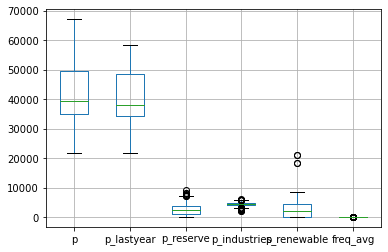

In [371]:
boxplot = d.boxplot(column=['p', 'p_lastyear','p_reserve','p_industries','p_renewable','freq_avg'])  
boxplot

<span style='color:olive'>حال باکس پلات داده ها را میکشیم تا معقول بودن داده ها را بررسی کنیم.  با توجه به اینکه مقادیر ماکسیمم ذخیره نیروگاه ها، مصرف برق صنایع و تولید نیروگاه هاری تجدید پذیر داده های پرتی هستند، نمیتوان ماکسیمم این داده هارا معقول فرض کرد. همچنین مینیمم ذخیره نیروگاه ها هم در داده هار پرت هست که معقول نیست. بجز این موارد بنظر میاید دامنه بقیه داده ها معقول هستند </span>

<span style='color:darkblue'>Question 2_2:  </span>

In [372]:
d=d[d.y>1395]
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323,1400.882,18
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322,1400.880,18
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321,1400.877,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,3518,1396/01/03,12:43,23705.0,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12
3518,3519,1396/01/02,20:17,26645.0,NaN,4044,3565,0,50.00,1396,1,2,2,1396.005,20
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1,1396.003,19


<span style='color:olive'>در این قسمت داده هایی که سالشان کمتر از 1396 بوده را حذف کردیم</span>

<span style='color:darkblue'>Question 3_1: </span>

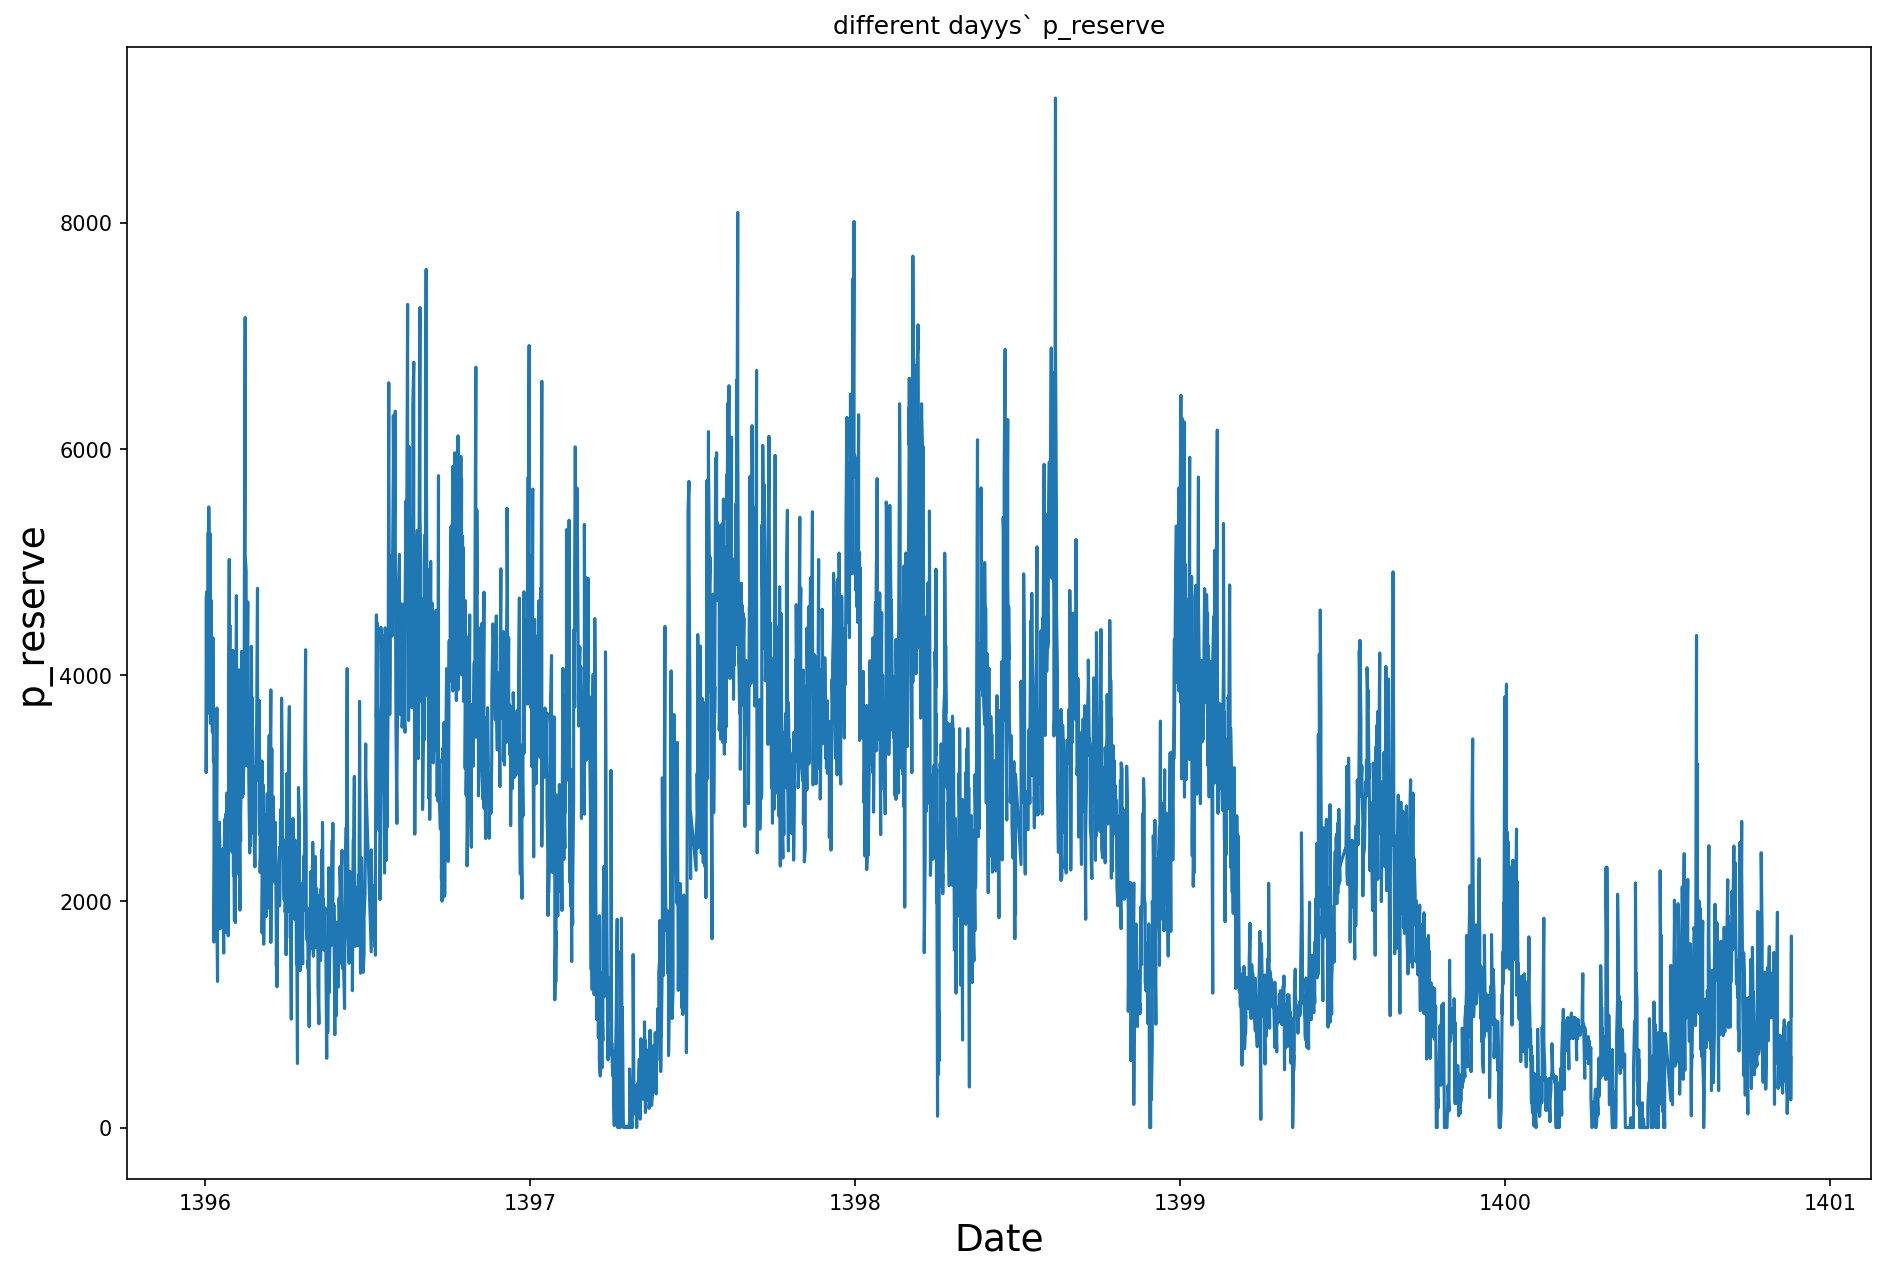

In [373]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.date_num.tolist(),d.p_reserve.tolist())
plt.xlabel("Date",fontsize=18)
plt.ylabel("p_reserve",fontsize=18)
plt.title('different dayys` p_reserve')
plt.show()

<span style='color:seagreen'>با توجه به نمودار شاهد نوسانات غیر معمول در کل بازه زمانی داده شده  هستیم. مقدارهایی که یک مرتبه زیاد و یا کم میشود و دوباره به حالت عادی قبلی برمیگردد</span>

<span style='color:darkblue'>Question 3_2: </span>

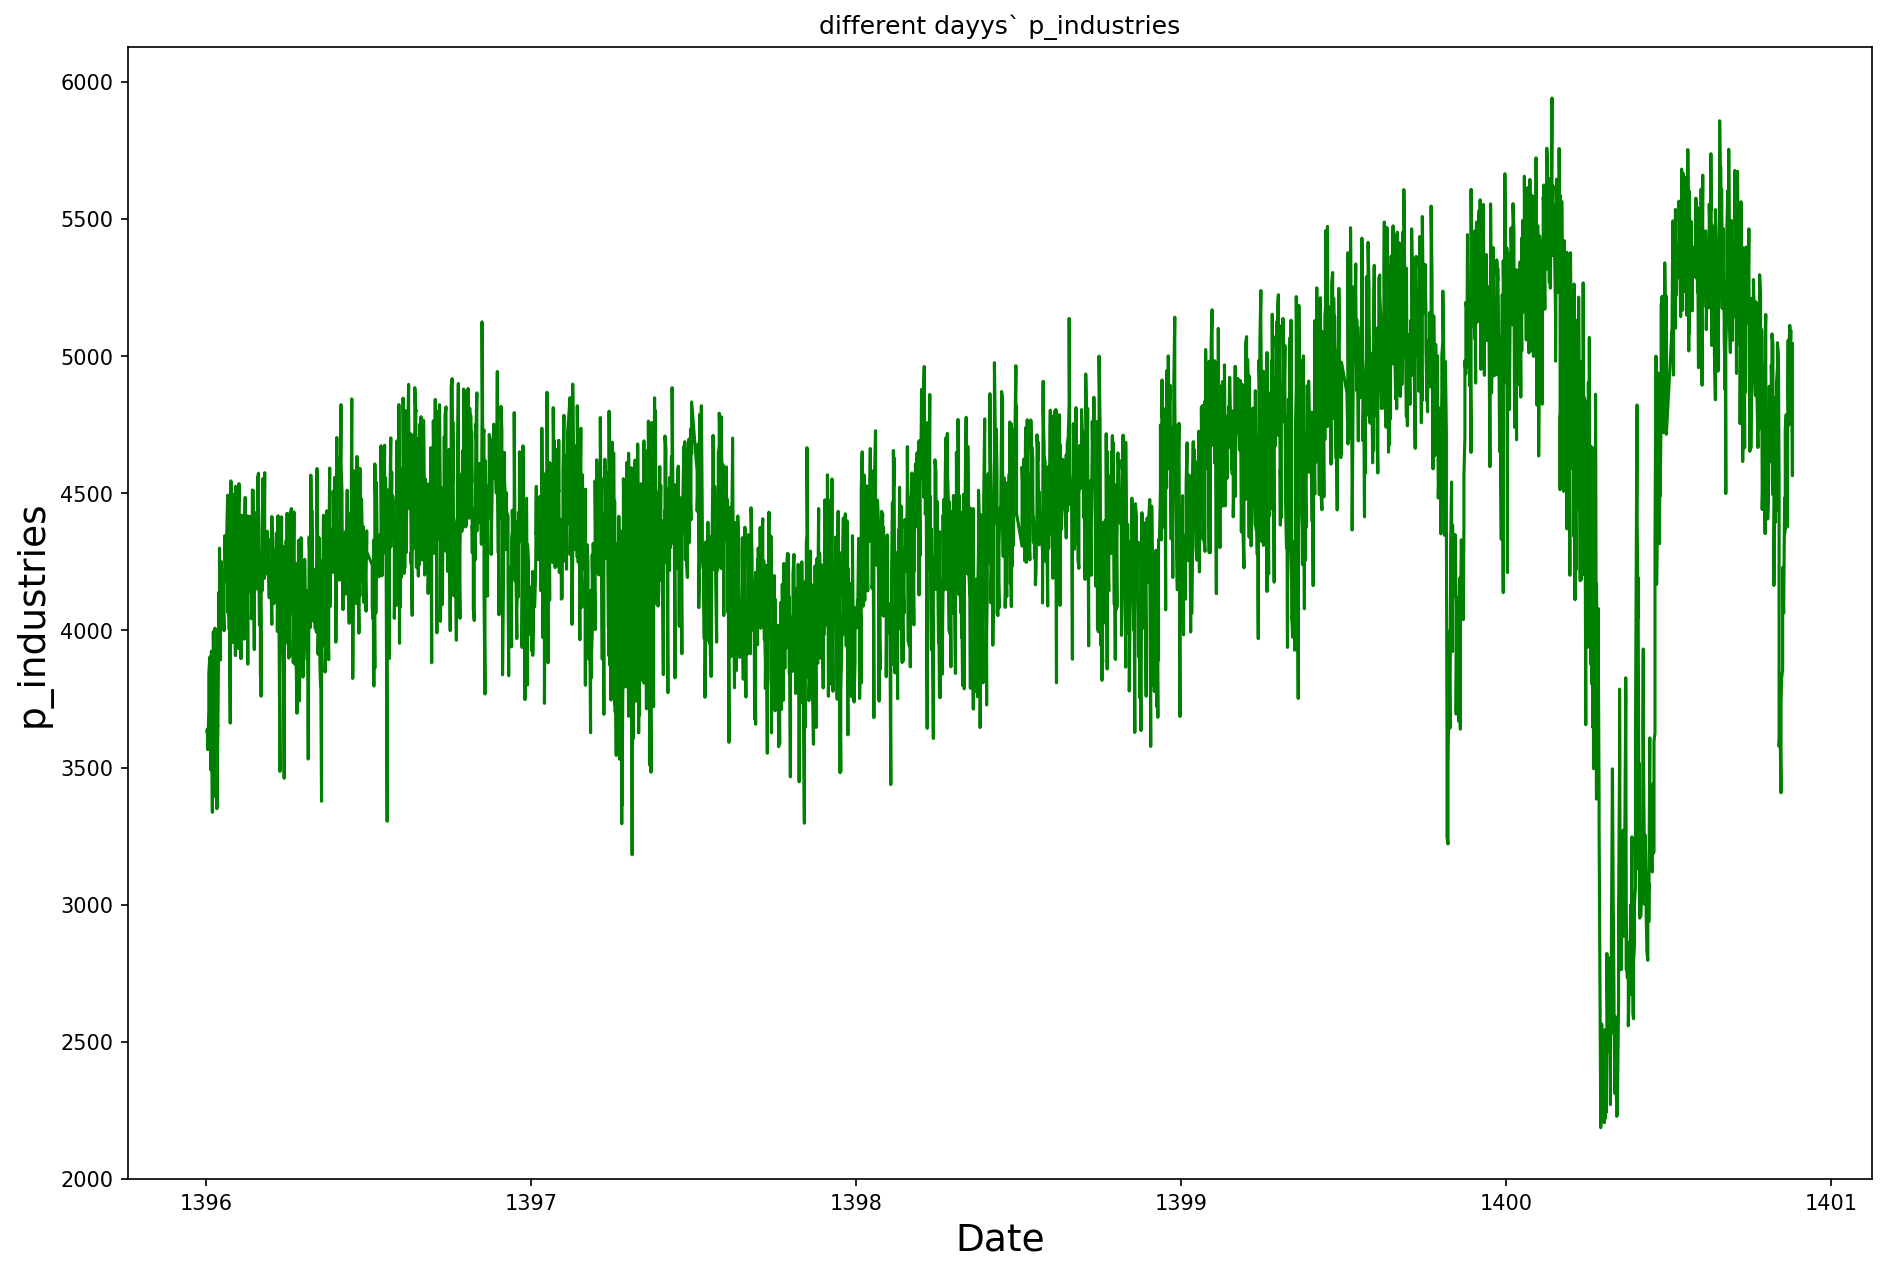

In [374]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.date_num.tolist(),d.p_industries.tolist(),c='g')
plt.xlabel("Date",fontsize=18)
plt.ylabel("p_industries",fontsize=18)
plt.title('different dayys` p_industries')
plt.show()

<span style='color:seagreen'>با توجه به نمودار شاهد نوسانات غیر معمول در کل بازه زمانی داده شده  هستیم. مخصوصا در طول سال 1400. مقدارهایی که یک مرتبه زیاد و یا کم میشود و دوباره به حالت عادی قبلی برمیگردد</span>

<span style='color:darkblue'>Question 3_3: </span>

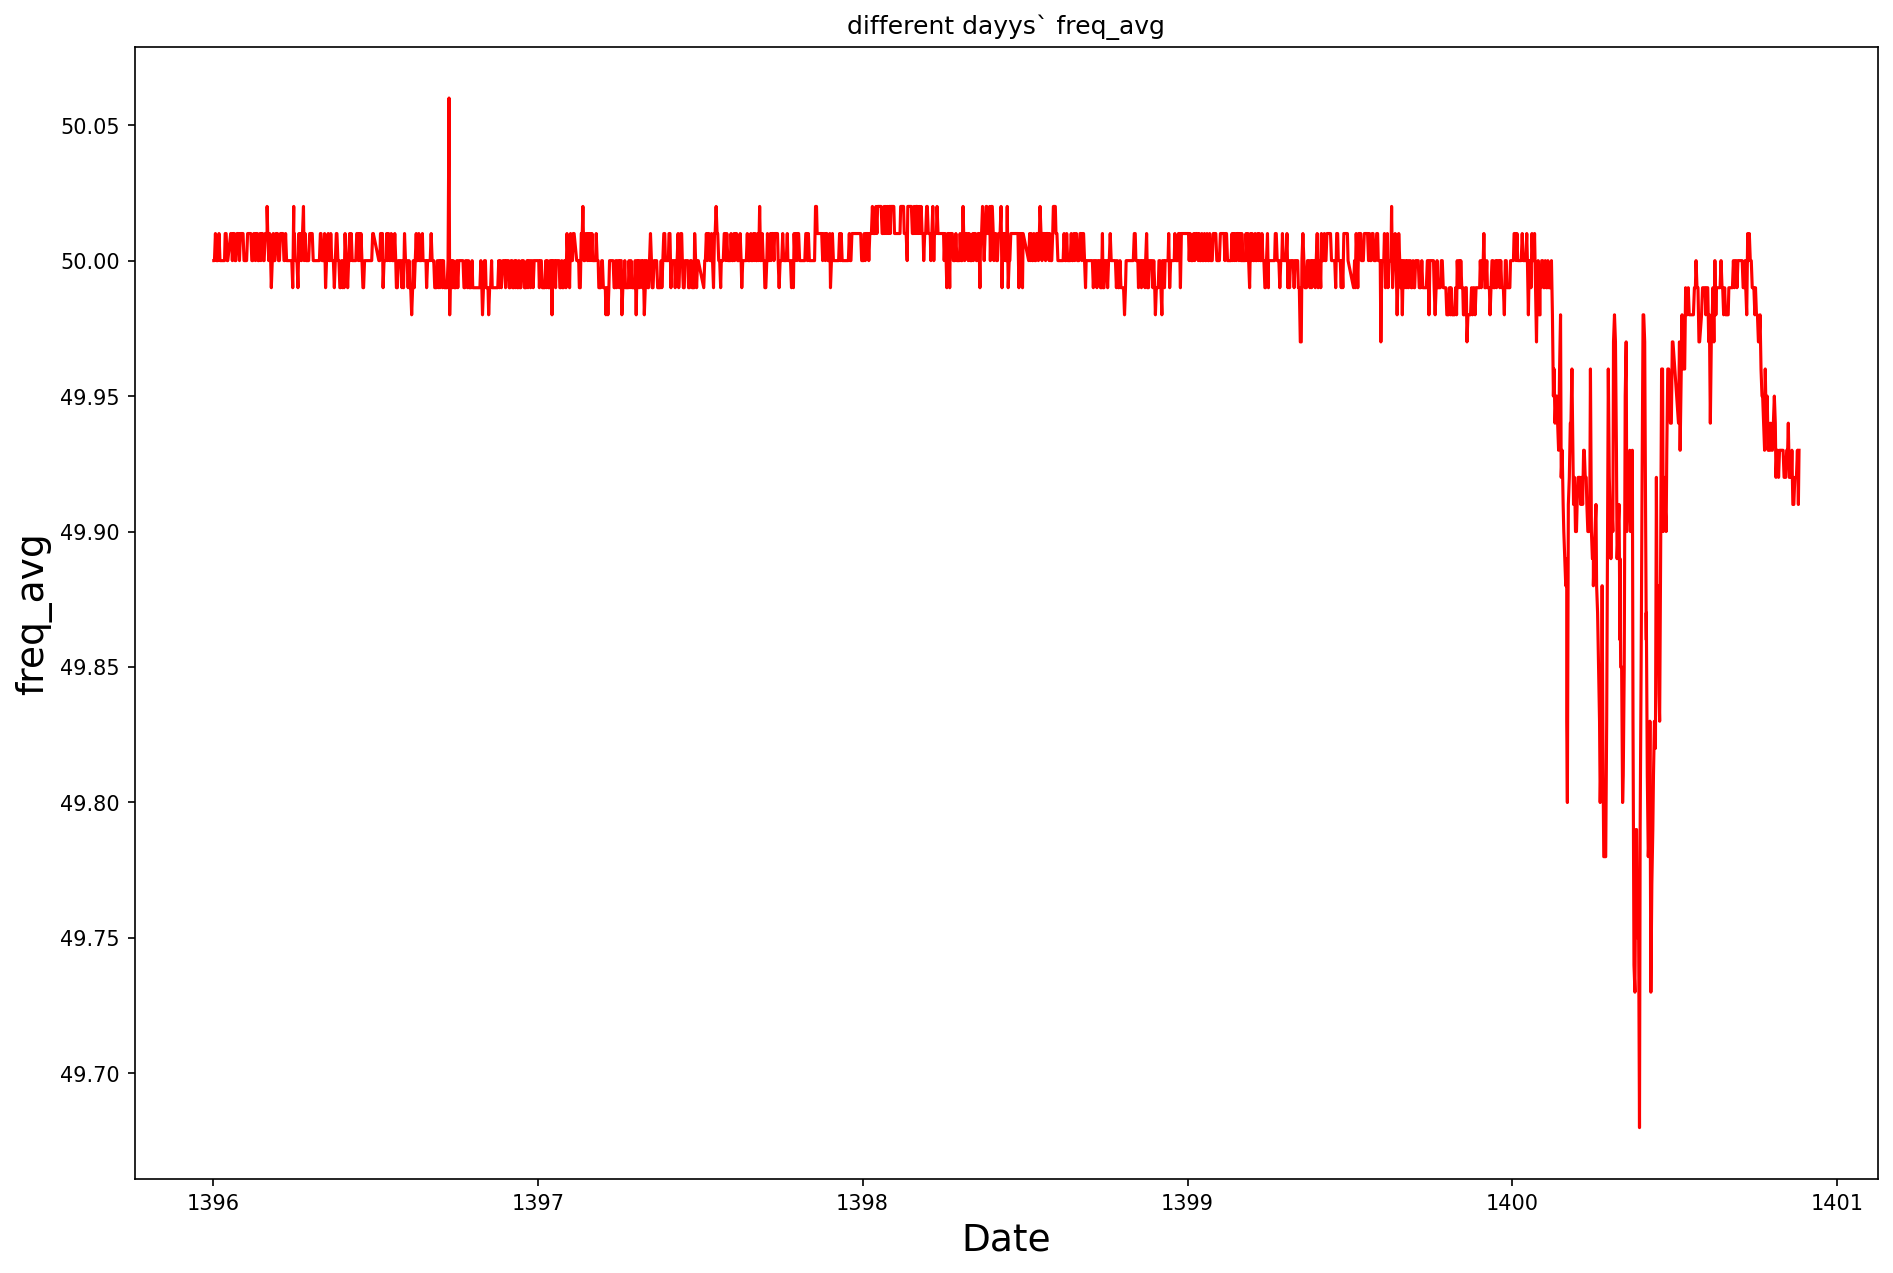

In [375]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.date_num.tolist(),d.freq_avg.tolist(),c='r')
plt.xlabel("Date",fontsize=18)
plt.ylabel("freq_avg",fontsize=18)
plt.title('different dayys` freq_avg')
plt.show()

<span style='color:seagreen'>در نیمه اول سال 1400 شاهد نوسال های به شدت غیر معقول در متوسط فرکانس هستیم  
 </span>

<span style='color:darkblue'>Question 4_1 and 4_2:  
 </span>

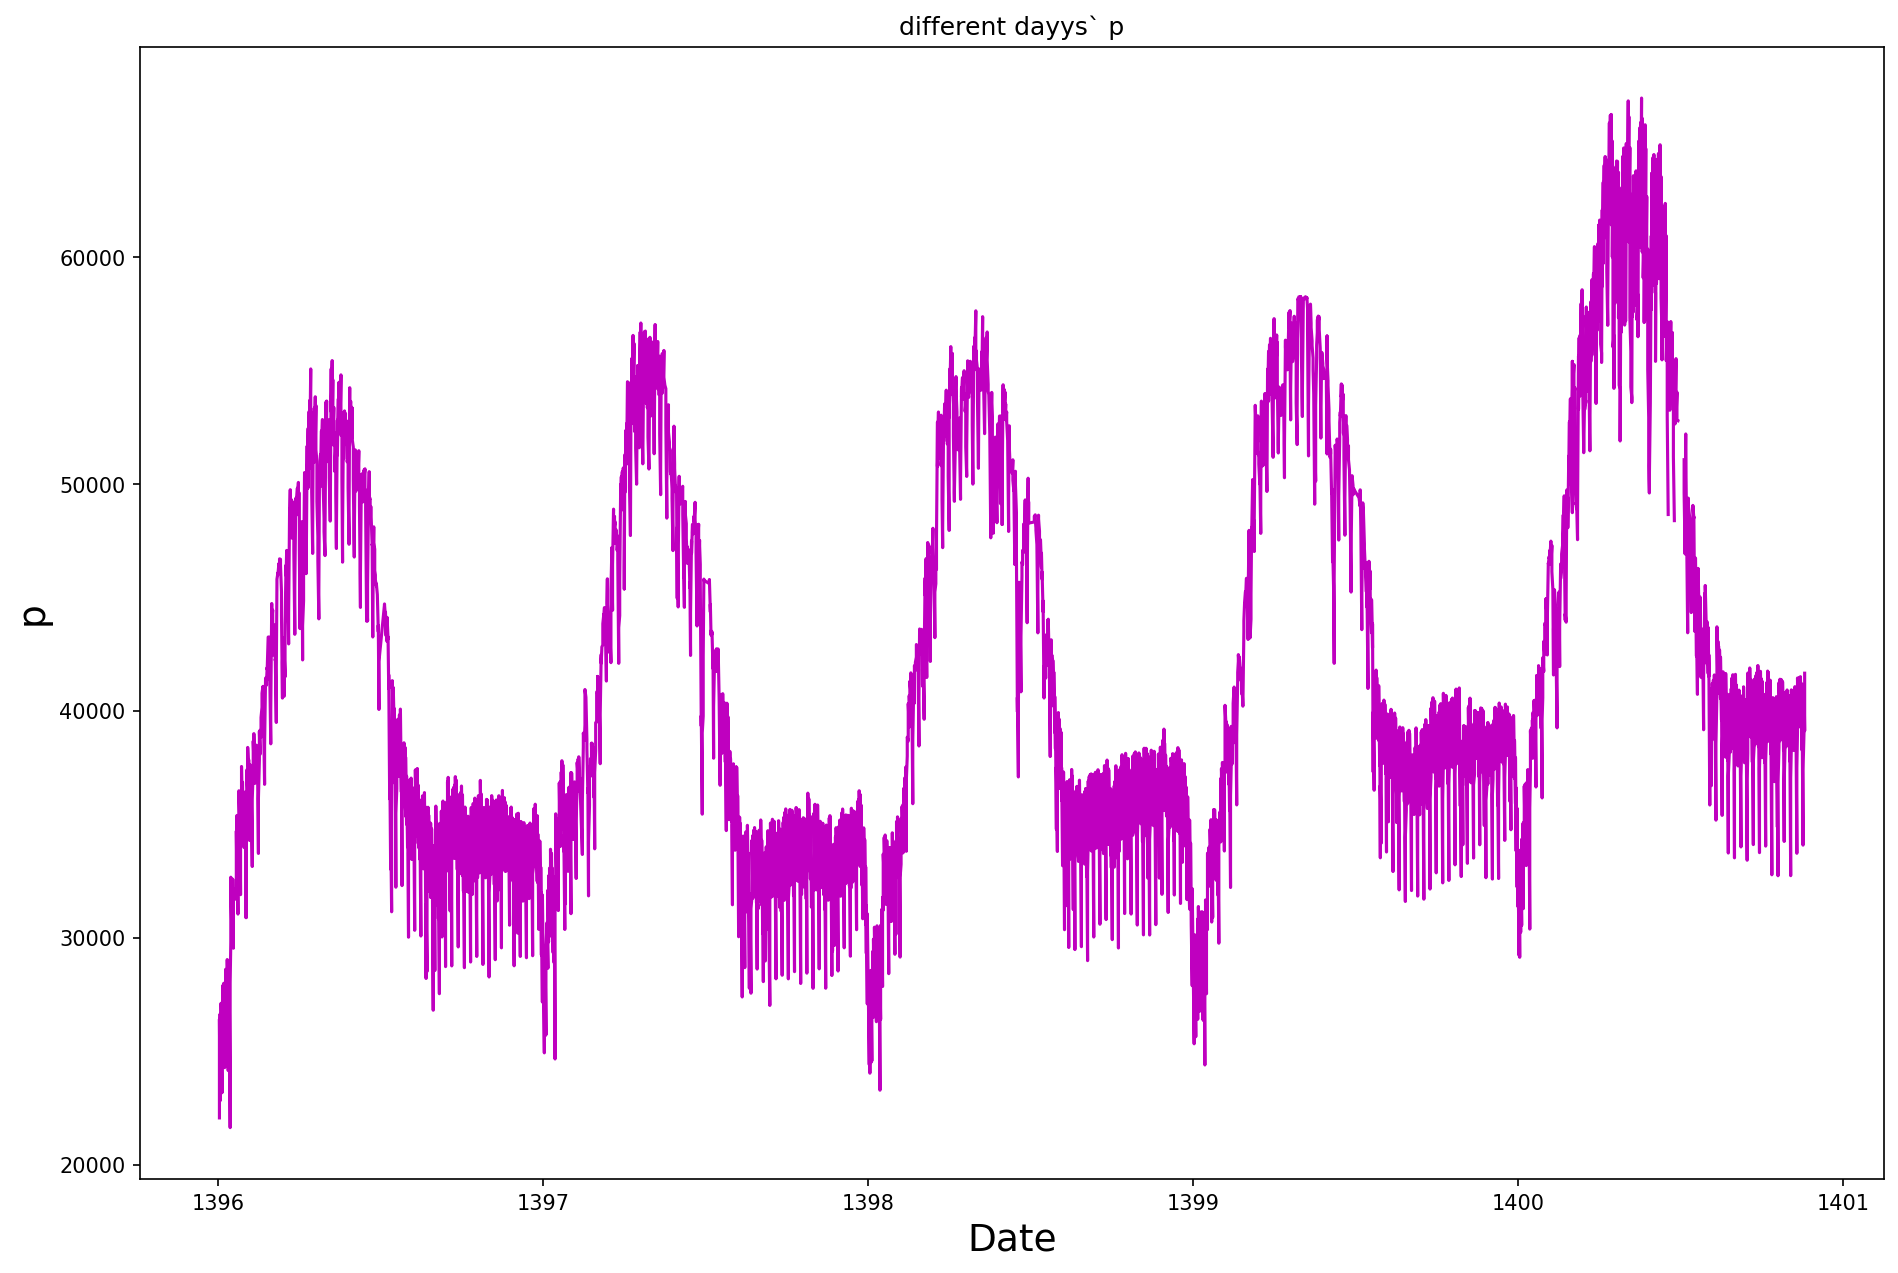

In [376]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.date_num.tolist(),d.p.tolist(),c='m')
plt.xlabel("Date",fontsize=18)
plt.ylabel("p",fontsize=18)
plt.title('different dayys` p')
plt.show()


<span style='color:seagreen'>به وضوح مقدار نیاز مصرف در پیک در نیمه ی اول هر سال با اختلاف از نیمه ی دوم هر سال بیشتر است که 
گزاره گفته شده را تایید میکند</span>



<span style='color:seagreen'>میتوان به سادگی مشاهده کرد که الگوی نیاز مصرف در پیک ثابت بوده، ابتدا صعودی و سپس نزولی و سپس تقریبا 
ثابت در بازه ی یک ساله. اما مقدار نیاز مصرف در پیک هر سال افزایش یافته است نسبت به سال قبل</span>

<span style='color:darkblue'>Question 4_3 and 4_4: </span>

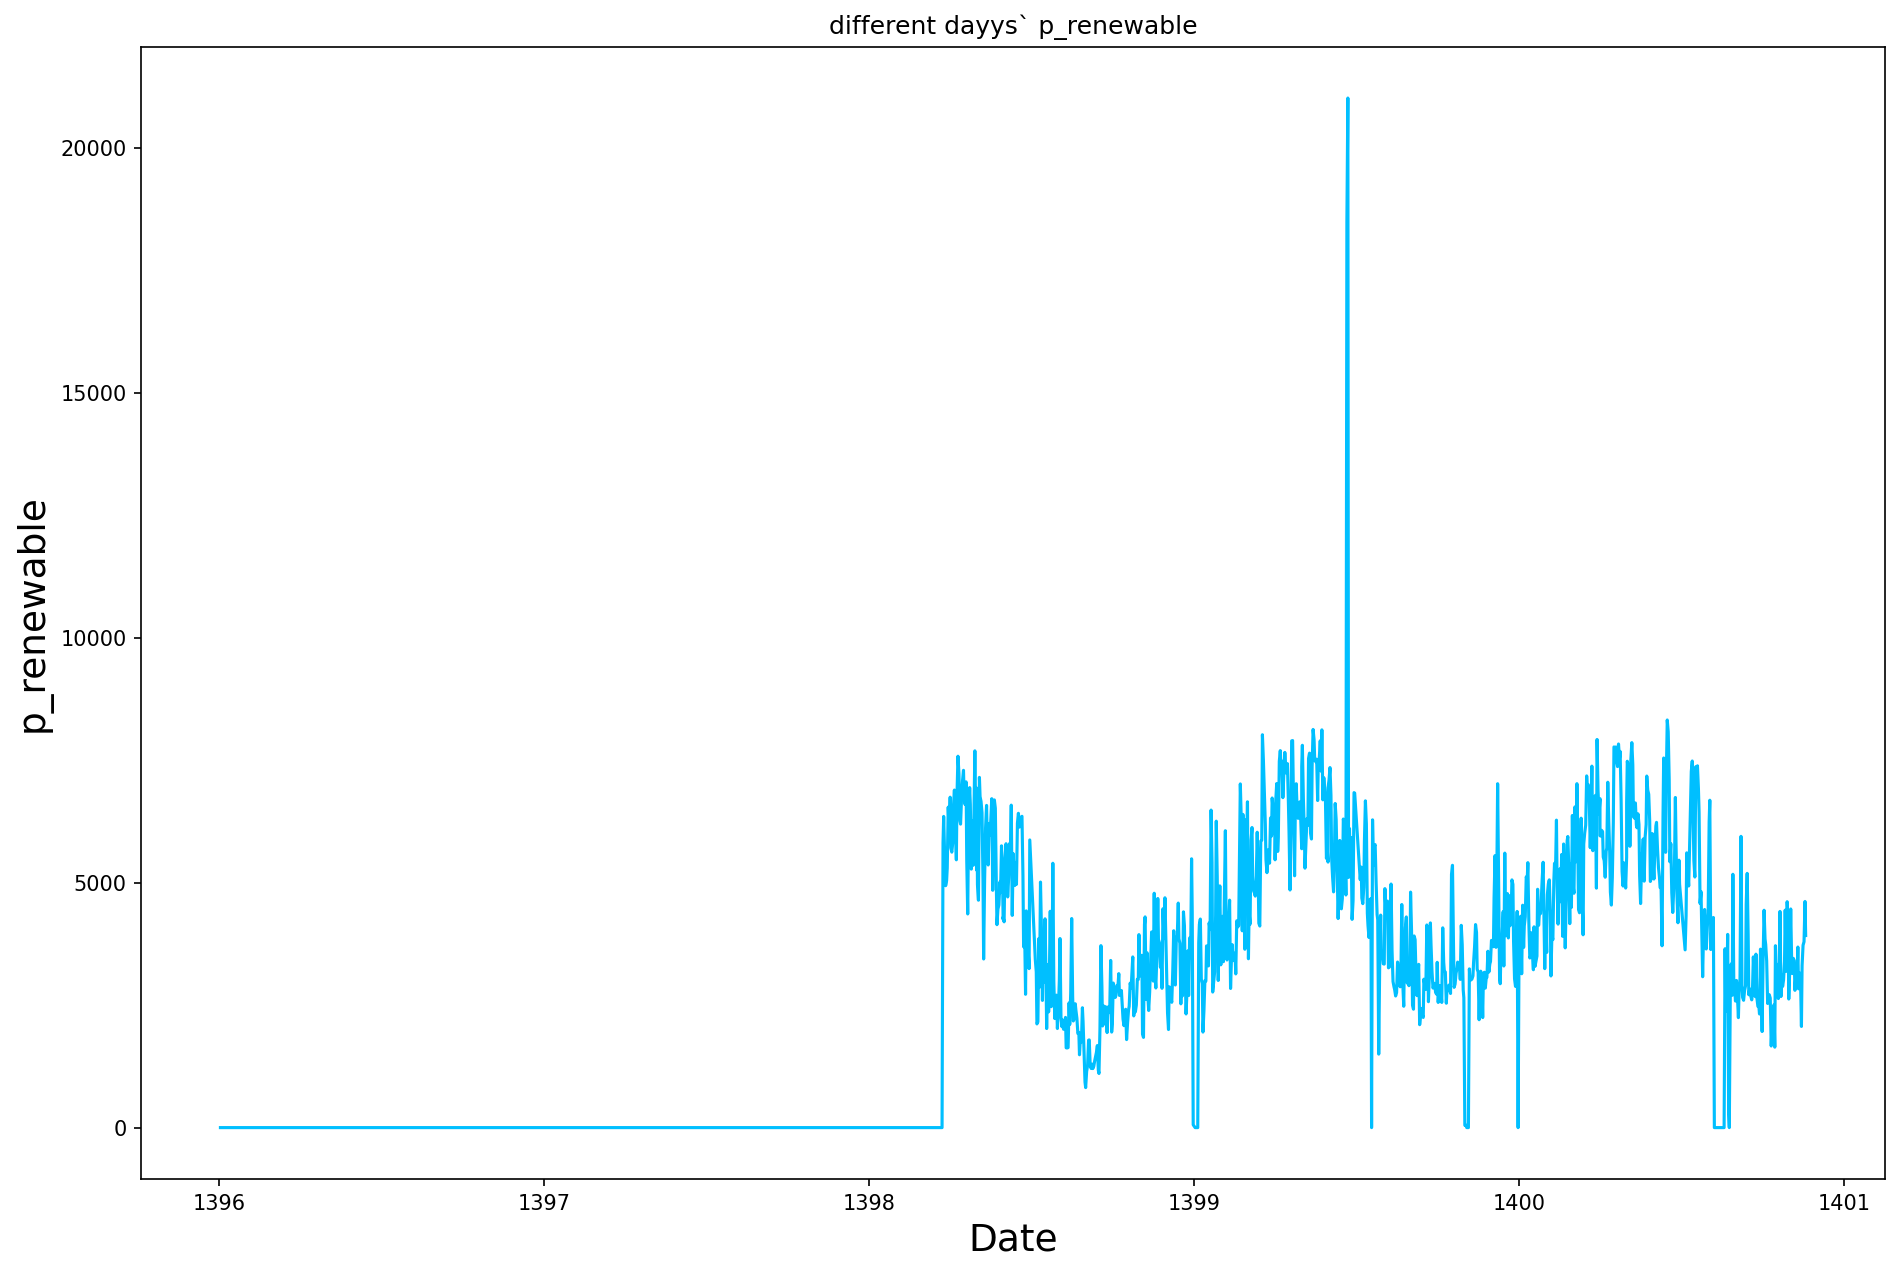

In [377]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.date_num.tolist(),d.p_renewable.tolist(),c='deepskyblue')
plt.xlabel("Date",fontsize=18)
plt.ylabel("p_renewable",fontsize=18)
plt.title('different dayys` p_renewable')
plt.show()

<span style='color:seagreen'> بله. میتوان فهمید که این مقدار در هر سال ابتدا صعودی است و سپس نزولی و بعد هم کمی صعودی</span>

<span style='color:seagreen'>بله. بعد از اوایل 1398 که دیتا ها قرار داده شده اند تا اخر 1400 نوسان هایی را میتوان مشاهده کرد</span>

# Part 4:

<span style='color:darkblue'>Question 1: </span>

In [378]:
d['timenumber']=d.time.str.replace(':','').astype(int)
df=d[d.timenumber<1559]
df=df[800<df.timenumber]


C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/1425731083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['timenumber']=d.time.str.replace(':','').astype(int)


<span style='color:olive'>در این قسمت ابتدا همه ساعت ها را از فرم 00:00 به فرم عددی 0000 تبدیل کرده ایم. سپس مقدار های عددی ای که در محدوده خواسته شده قرار گرفته اند را در دیتا فرم جدید ریخته ایم </span>

In [379]:
df

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12,1234
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11,1145
5,6,1400/11/15,11:59,34089.0,37933.0,452,5094,3793,49.93,1400,11,15,321,1400.877,11,1159
7,8,1400/11/14,11:54,38276.0,37903.0,929,5112,3722,49.92,1400,11,14,320,1400.874,11,1154
9,10,1400/11/13,11:31,39327.0,38201.0,613,4749,3305,49.92,1400,11,13,319,1400.871,11,1131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,3514,1396/01/05,12:35,24671.0,NaN,4174,3491,0,50.00,1396,1,5,5,1396.014,12,1235
3515,3516,1396/01/04,13:30,23177.0,NaN,5279,3903,0,50.00,1396,1,4,4,1396.011,13,1330
3517,3518,1396/01/03,12:43,23705.0,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12,1243
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12,1209


<span style='color:olive'>برای چک کردن دیتا فرم جدید  
 </span>

<span style='color:darkblue'> Question 2:</span>

In [380]:
d.groupby('date').p.max()


date
1396/01/01    26416.0
1396/01/02    26645.0
1396/01/03    27120.0
1396/01/04    26722.0
1396/01/05    27915.0
               ...   
1400/11/13    41236.0
1400/11/14    40168.0
1400/11/15    37405.0
1400/11/16    41165.0
1400/11/17    41666.0
Name: p, Length: 1775, dtype: float64

<span style='color:olive'>در این قسمت بیشترین مقدار پیک در هر روز را پیدا کرده ایم 
 </span>

In [381]:
df=df.drop(columns=['p'])

<span style='color:olive'>ستون بیشترین مصرف در پیک را حذف میکنیم تا ماکسیممش را بهش تخصیص بدیم </span>

In [382]:
df=df.merge(d.groupby('date').p.max(),on='date')

<span style='color:olive'>حال با مرج کردن دو دیتا فریم بر روی تاریخ، دیتا ها را یکی میکنیم 
 </span>

In [383]:
df

,r,date,time,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber,p
0,2,1400/11/17,12:34,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12,1234,41666.0
1,4,1400/11/16,11:45,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11,1145,41165.0
2,6,1400/11/15,11:59,37933.0,452,5094,3793,49.93,1400,11,15,321,1400.877,11,1159,37405.0
3,8,1400/11/14,11:54,37903.0,929,5112,3722,49.92,1400,11,14,320,1400.874,11,1154,40168.0
4,10,1400/11/13,11:31,38201.0,613,4749,3305,49.92,1400,11,13,319,1400.871,11,1131,41236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,3514,1396/01/05,12:35,NaN,4174,3491,0,50.00,1396,1,5,5,1396.014,12,1235,27915.0
1689,3516,1396/01/04,13:30,NaN,5279,3903,0,50.00,1396,1,4,4,1396.011,13,1330,26722.0
1690,3518,1396/01/03,12:43,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12,1243,27120.0
1691,3520,1396/01/02,12:09,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12,1209,26645.0


<span style='color:olive'>برای چک کردن دیتا فرم جدید </span>

<span style='color:darkblue'> Question 3:</span>

In [384]:
d_cal=pd.read_excel('C:/Users/EMERTAT/Downloads/PersainCalender.xlsx')


<span style='color:olive'>فراخوانی دیتا جدید </span>

In [385]:
d_cal

,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en
0,1396/01/01,سه شنبه,1,2017-03-21,Tuesday
1,1396/01/02,چهارشنبه,1,2017-03-22,Wednesday
2,1396/01/03,پنجشنبه,1,2017-03-23,Thursday
3,1396/01/04,جمعه,1,2017-03-24,Friday
4,1396/01/05,شنبه,0,2017-03-25,Saturday
...,...,...,...,...,...
1821,1400/12/25,چهارشنبه,0,2022-03-16,Wednesday
1822,1400/12/26,پنجشنبه,0,2022-03-17,Thursday
1823,1400/12/27,جمعه,1,2022-03-18,Friday
1824,1400/12/28,شنبه,0,2022-03-19,Saturday


<span style='color:olive'>اطمینان حاصل کردن از درست خوانده شدن مقادیر </span>

<span style='color:darkblue'>Question 4: </span>

In [386]:
df=pd.merge(d_cal,df,left_on='date_pr',right_on='date')
df

,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en,r,date,time,p_lastyear,p_reserve,...,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber,p
0,1396/01/01,سه شنبه,1,2017-03-21,Tuesday,3522,1396/01/01,12:26,NaN,4690,...,0,50.00,1396,1,1,1,1396.003,12,1226,26416.0
1,1396/01/02,چهارشنبه,1,2017-03-22,Wednesday,3520,1396/01/02,12:09,NaN,4740,...,0,50.00,1396,1,2,2,1396.005,12,1209,26645.0
2,1396/01/03,پنجشنبه,1,2017-03-23,Thursday,3518,1396/01/03,12:43,NaN,4464,...,0,50.01,1396,1,3,3,1396.008,12,1243,27120.0
3,1396/01/04,جمعه,1,2017-03-24,Friday,3516,1396/01/04,13:30,NaN,5279,...,0,50.00,1396,1,4,4,1396.011,13,1330,26722.0
4,1396/01/05,شنبه,0,2017-03-25,Saturday,3514,1396/01/05,12:35,NaN,4174,...,0,50.00,1396,1,5,5,1396.014,12,1235,27915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,1400/11/13,چهارشنبه,0,2022-02-02,Wednesday,10,1400/11/13,11:31,38201.0,613,...,3305,49.92,1400,11,13,319,1400.871,11,1131,41236.0
1689,1400/11/14,پنجشنبه,0,2022-02-03,Thursday,8,1400/11/14,11:54,37903.0,929,...,3722,49.92,1400,11,14,320,1400.874,11,1154,40168.0
1690,1400/11/15,جمعه,0,2022-02-04,Friday,6,1400/11/15,11:59,37933.0,452,...,3793,49.93,1400,11,15,321,1400.877,11,1159,37405.0
1691,1400/11/16,شنبه,0,2022-02-05,Saturday,4,1400/11/16,11:45,37097.0,628,...,4615,49.91,1400,11,16,322,1400.880,11,1145,41165.0


<span style='color:olive'>تلفیق دو دیتافریم بر روی ستون تاریخ. حال میتوانیم با توجه به هالیدی_اینکل متوجه شویم که روز مورد نظر تعطیل است یا خیر </span>

<span style='color:darkblue'>part 5: </span>

In [387]:
WE=df[df.holiday_inCal==1]
WD=df[df.holiday_inCal==0]                                                                                                       

<span style='color:olive'>دیتافریم را به دو بخش تبدیل میکنیم. به این صورت که دیتا ی روز های تعطیل رو یک دیتافریم و روز های غیر تعطیل در یک دیتا فریم دیگر قرار گیرند </span>

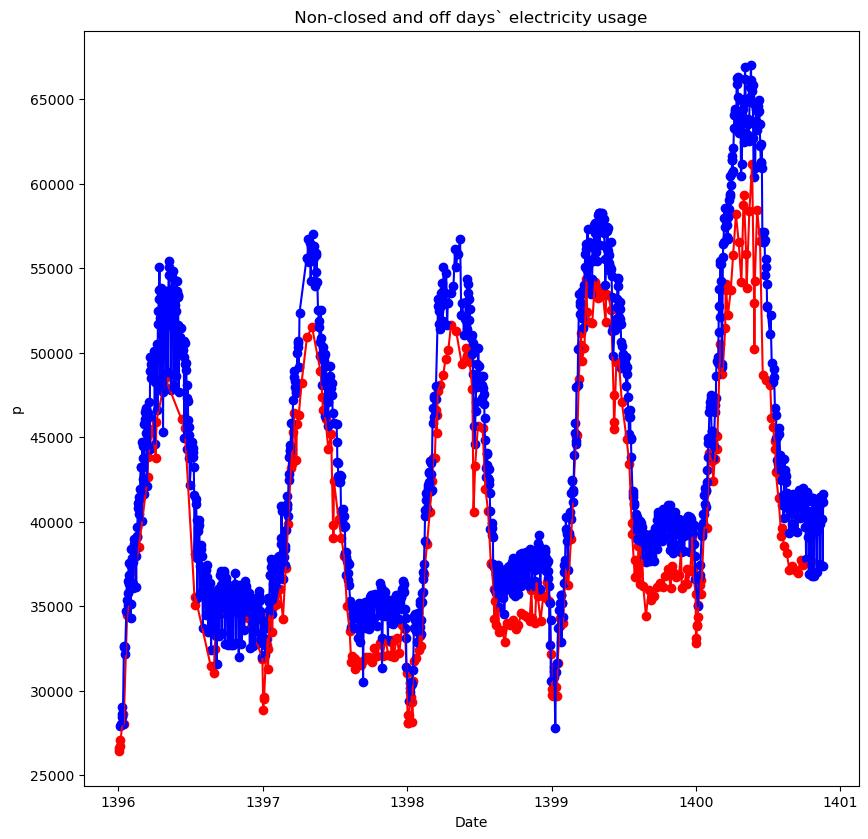

In [388]:
plt.figure(figsize=(10,10),dpi=100)
plt.plot(WE['date_num'],WE['p'],c='red')
plt.plot(WD['date_num'],WD['p'],c='blue')
plt.scatter(WE['date_num'],WE['p'],c='red')
plt.scatter(WD['date_num'],WD['p'],c='blue')
plt.xlabel('Date')
plt.ylabel('p')
plt.title(' Non-closed and off days` electricity usage ')
plt.show()  

<span style='color:olive'>نموداری متشکل از خط و نقطه برای بیشترین مصرف پیک در روز های تعطیل و غیرتعطیل کشیده ایم که به ترتیب به رنگ های قرمز و آبی هستند</span>

<span style='color:seagreen'>بله. در اکثر روز ها میتوان متوجه تمایز شد</span>

<span style='color:darkblue'>Question 6:</span>

In [389]:
df['holiday_inCal'][(df['m']==1) & (df['d'] <= 13)]=1

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/4083659435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_inCal'][(df['m']==1) & (df['d'] <= 13)]=1


<span style='color:olive'>دیتا هایی که در ماه اول سال و در 13 روز اول این ماه هستند، جز 13 روز عید هستند. مقدار هالیدی_اینکل این روز ها را برابر 1 قرار داده ایم  </span>

<span style='color:darkblue'>Question 7:</span>

In [390]:
df['dayafter_holiday_inCal']=df['holiday_inCal'].shift(1)
df['daybefore_holiday_inCal']=df['holiday_inCal'].shift(-1)
df

,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en,r,date,time,p_lastyear,p_reserve,...,y,m,d,n_days,date_num,h,timenumber,p,dayafter_holiday_inCal,daybefore_holiday_inCal
0,1396/01/01,سه شنبه,1,2017-03-21,Tuesday,3522,1396/01/01,12:26,NaN,4690,...,1396,1,1,1,1396.003,12,1226,26416.0,NaN,1.0
1,1396/01/02,چهارشنبه,1,2017-03-22,Wednesday,3520,1396/01/02,12:09,NaN,4740,...,1396,1,2,2,1396.005,12,1209,26645.0,1.0,1.0
2,1396/01/03,پنجشنبه,1,2017-03-23,Thursday,3518,1396/01/03,12:43,NaN,4464,...,1396,1,3,3,1396.008,12,1243,27120.0,1.0,1.0
3,1396/01/04,جمعه,1,2017-03-24,Friday,3516,1396/01/04,13:30,NaN,5279,...,1396,1,4,4,1396.011,13,1330,26722.0,1.0,1.0
4,1396/01/05,شنبه,1,2017-03-25,Saturday,3514,1396/01/05,12:35,NaN,4174,...,1396,1,5,5,1396.014,12,1235,27915.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,1400/11/13,چهارشنبه,0,2022-02-02,Wednesday,10,1400/11/13,11:31,38201.0,613,...,1400,11,13,319,1400.871,11,1131,41236.0,0.0,0.0
1689,1400/11/14,پنجشنبه,0,2022-02-03,Thursday,8,1400/11/14,11:54,37903.0,929,...,1400,11,14,320,1400.874,11,1154,40168.0,0.0,0.0
1690,1400/11/15,جمعه,0,2022-02-04,Friday,6,1400/11/15,11:59,37933.0,452,...,1400,11,15,321,1400.877,11,1159,37405.0,0.0,0.0
1691,1400/11/16,شنبه,0,2022-02-05,Saturday,4,1400/11/16,11:45,37097.0,628,...,1400,11,16,322,1400.880,11,1145,41165.0,0.0,0.0


<span style='color:olive'>در این قسمت با اضافه کردن دو ستون، مشخص کرده ایم که آیا فردا و یا دیروز روز مورد نظر تعطیل بوده یا نه. مقدار 1 در هر یک از این دو ستون نشانگر تعطیل بودن روز بعد( یا قبل، با توجه به ستونی که در آن 1 قرار دارد) و مقدار 0 به صورت برعکس تعریف شده است.  </span>

In [391]:
df['holiday_inCal'][(df['dayafter_holiday_inCal']==1)&(df['daybefore_holiday_inCal']==1)] = 0.5
df['holiday_inCal'][df['weekday_en']=='Thursday'] = 0.5

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/692915110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_inCal'][(df['dayafter_holiday_inCal']==1)&(df['daybefore_holiday_inCal']==1)] = 0.5
C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/692915110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_inCal'][df['weekday_en']=='Thursday'] = 0.5


<span style='color:olive'>در صورتی یکروز میان دو تطعیلی است که روز قبل و بعدش هم تطعیل باشد. با این استدلال، روز های نیمه تعطیل را شناسایی کرده و مقدار هالیدی_اینکل آنها را برابر 0.5  قرار داده ایم </span>

In [392]:
holidays=df[df['holiday_inCal']==1]
normal=df[df['holiday_inCal']==0]
mahmood_holidays=df[df['holiday_inCal']==0.5]#evil laugh

<span style='color:olive'>دیتا های هر یک از روز های تعطیل، نیمه تعطیل و غیر تعطیل را در یک دیتا فرم جدا میریزیم   </span>

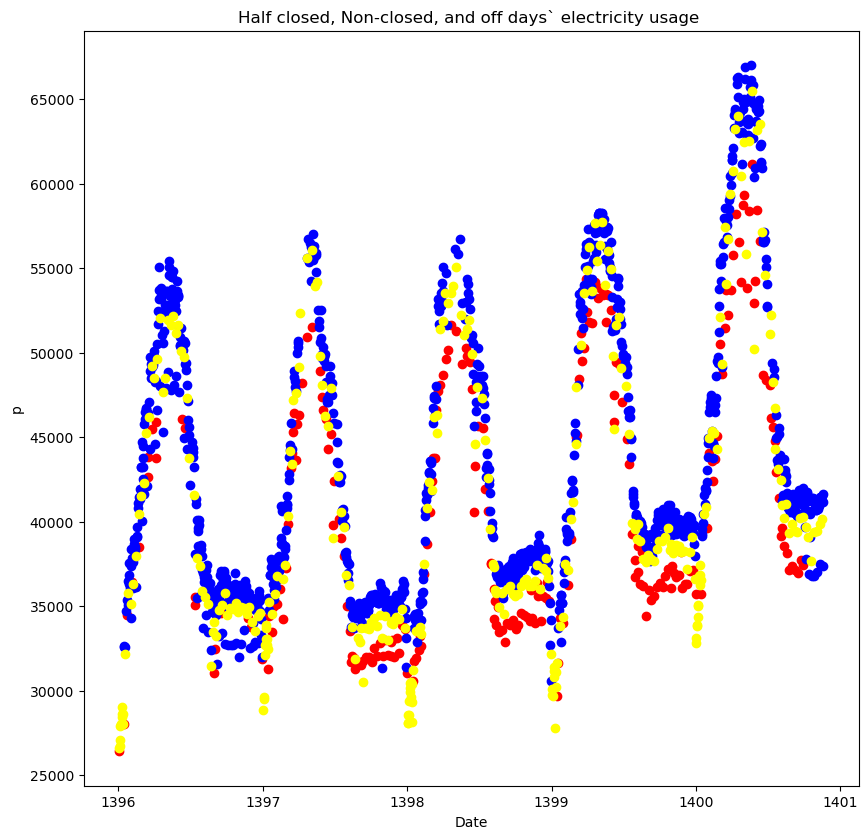

In [393]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(holidays['date_num'],holidays['p'],c='red')
plt.scatter(normal['date_num'],normal['p'],c='blue')
plt.scatter(mahmood_holidays['date_num'],mahmood_holidays['p'],c='yellow')
plt.xlabel('Date')
plt.ylabel('p')
plt.title('Half closed, Non-closed, and off days` electricity usage ')
plt.show()

<span style='color:olive'> نمودار خواسته شده را رسم کردیم </span>

***********

# Part 5:

<span style='color:darkblue'>Question 1:</span>

In [394]:
df.loc[df['holiday_inCal']==1,'p_holiday_interpolated']=df.p
df

,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en,r,date,time,p_lastyear,p_reserve,...,m,d,n_days,date_num,h,timenumber,p,dayafter_holiday_inCal,daybefore_holiday_inCal,p_holiday_interpolated
0,1396/01/01,سه شنبه,1.0,2017-03-21,Tuesday,3522,1396/01/01,12:26,NaN,4690,...,1,1,1,1396.003,12,1226,26416.0,NaN,1.0,26416.0
1,1396/01/02,چهارشنبه,0.5,2017-03-22,Wednesday,3520,1396/01/02,12:09,NaN,4740,...,1,2,2,1396.005,12,1209,26645.0,1.0,1.0,NaN
2,1396/01/03,پنجشنبه,0.5,2017-03-23,Thursday,3518,1396/01/03,12:43,NaN,4464,...,1,3,3,1396.008,12,1243,27120.0,1.0,1.0,NaN
3,1396/01/04,جمعه,0.5,2017-03-24,Friday,3516,1396/01/04,13:30,NaN,5279,...,1,4,4,1396.011,13,1330,26722.0,1.0,1.0,NaN
4,1396/01/05,شنبه,0.5,2017-03-25,Saturday,3514,1396/01/05,12:35,NaN,4174,...,1,5,5,1396.014,12,1235,27915.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,1400/11/13,چهارشنبه,0.0,2022-02-02,Wednesday,10,1400/11/13,11:31,38201.0,613,...,11,13,319,1400.871,11,1131,41236.0,0.0,0.0,NaN
1689,1400/11/14,پنجشنبه,0.5,2022-02-03,Thursday,8,1400/11/14,11:54,37903.0,929,...,11,14,320,1400.874,11,1154,40168.0,0.0,0.0,NaN
1690,1400/11/15,جمعه,0.0,2022-02-04,Friday,6,1400/11/15,11:59,37933.0,452,...,11,15,321,1400.877,11,1159,37405.0,0.0,0.0,NaN
1691,1400/11/16,شنبه,0.0,2022-02-05,Saturday,4,1400/11/16,11:45,37097.0,628,...,11,16,322,1400.880,11,1145,41165.0,0.0,0.0,NaN


<span style='color:seagreen'>بخش هایی از دیتا رو جدا میکنیم که مربوط به روز های تعطیله و بعد داده ها رو فراخوانی میکنیم</span>

In [395]:
df.loc[df['holiday_inCal']==0,'p_working_interpolated']=df.p
df

,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en,r,date,time,p_lastyear,p_reserve,...,d,n_days,date_num,h,timenumber,p,dayafter_holiday_inCal,daybefore_holiday_inCal,p_holiday_interpolated,p_working_interpolated
0,1396/01/01,سه شنبه,1.0,2017-03-21,Tuesday,3522,1396/01/01,12:26,NaN,4690,...,1,1,1396.003,12,1226,26416.0,NaN,1.0,26416.0,NaN
1,1396/01/02,چهارشنبه,0.5,2017-03-22,Wednesday,3520,1396/01/02,12:09,NaN,4740,...,2,2,1396.005,12,1209,26645.0,1.0,1.0,NaN,NaN
2,1396/01/03,پنجشنبه,0.5,2017-03-23,Thursday,3518,1396/01/03,12:43,NaN,4464,...,3,3,1396.008,12,1243,27120.0,1.0,1.0,NaN,NaN
3,1396/01/04,جمعه,0.5,2017-03-24,Friday,3516,1396/01/04,13:30,NaN,5279,...,4,4,1396.011,13,1330,26722.0,1.0,1.0,NaN,NaN
4,1396/01/05,شنبه,0.5,2017-03-25,Saturday,3514,1396/01/05,12:35,NaN,4174,...,5,5,1396.014,12,1235,27915.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,1400/11/13,چهارشنبه,0.0,2022-02-02,Wednesday,10,1400/11/13,11:31,38201.0,613,...,13,319,1400.871,11,1131,41236.0,0.0,0.0,NaN,41236.0
1689,1400/11/14,پنجشنبه,0.5,2022-02-03,Thursday,8,1400/11/14,11:54,37903.0,929,...,14,320,1400.874,11,1154,40168.0,0.0,0.0,NaN,NaN
1690,1400/11/15,جمعه,0.0,2022-02-04,Friday,6,1400/11/15,11:59,37933.0,452,...,15,321,1400.877,11,1159,37405.0,0.0,0.0,NaN,37405.0
1691,1400/11/16,شنبه,0.0,2022-02-05,Saturday,4,1400/11/16,11:45,37097.0,628,...,16,322,1400.880,11,1145,41165.0,0.0,0.0,NaN,41165.0


<span style='color:olive'>بخش هایی از دتیا رو مجزا میکنیم که مربوط به روز های کاریه و بعد اون رو فراخوانی میکنیم</span>

In [396]:
df[['p_working_interpolated','p_holiday_interpolated']].interpolate()

,p_working_interpolated,p_holiday_interpolated
0,NaN,26416.0
1,NaN,26549.5
2,NaN,26683.0
3,NaN,26816.5
4,NaN,26950.0
...,...,...
1688,41236.0,37468.0
1689,39320.5,37468.0
1690,37405.0,37468.0
1691,41165.0,37468.0


<span style='color:olive'>از جدول مرتب شده ی جدید درون یابی خطی میگیریم</span>

<span style='color:darkblue'>Question 2: </span>

In [397]:
d1=df[['date','y','m','p_working_interpolated','p_holiday_interpolated']].interpolate()
d1

,date,y,m,p_working_interpolated,p_holiday_interpolated
0,1396/01/01,1396,1,NaN,26416.0
1,1396/01/02,1396,1,NaN,26549.5
2,1396/01/03,1396,1,NaN,26683.0
3,1396/01/04,1396,1,NaN,26816.5
4,1396/01/05,1396,1,NaN,26950.0
...,...,...,...,...,...
1688,1400/11/13,1400,11,41236.0,37468.0
1689,1400/11/14,1400,11,39320.5,37468.0
1690,1400/11/15,1400,11,37405.0,37468.0
1691,1400/11/16,1400,11,41165.0,37468.0


<span style='color:olive'>بعد از اضافه کردن دو ستون جدید خواسته شده به دیتا پاسخ نهایی را کمی مرتب تر میکنیم و دیتا را فراخوانی میکنیم</span>

In [398]:
A=(d1[d1['y']==1398])
A

,date,y,m,p_working_interpolated,p_holiday_interpolated
695,1398/01/01,1398,1,31673.333333,31025.785714
696,1398/01/02,1398,1,31799.500000,30989.571429
697,1398/01/03,1398,1,31925.666667,30953.357143
698,1398/01/04,1398,1,32051.833333,30917.142857
699,1398/01/05,1398,1,32178.000000,30880.928571
...,...,...,...,...,...
1014,1398/12/25,1398,12,32696.000000,34587.875000
1015,1398/12/26,1398,12,35194.000000,34236.812500
1016,1398/12/27,1398,12,34178.000000,33885.750000
1017,1398/12/28,1398,12,30564.000000,33534.687500


<span style='color:olive'>برای ماه های هر سال باید مقدار متوسط روزانه درون یابی خطی را بدست آوریم در درجه اول باید سال ها از هم مجزا شوند</span>

In [399]:
A[A.m==2].p_holiday_interpolated.mean()

37158.12903225807

<span style='color:olive'>میانگین میگیریم جهت حاصل کردن اطمینان</span>

In [400]:
d1=d1[['y','m','p_holiday_interpolated','p_working_interpolated']]

<span style='color:olive'>ستون هایی که از داده ی مرتب شده ی جدید نیاز داریم را فراخوانی میکنیم</span>

In [401]:
d1.pivot_table(index=['y','m'])

p_holiday_interpolated  p_working_interpolated
y    m                                                 
1396 1             30761.849754            35221.156250
     2             37851.724131            39576.645161
     3             43339.430303            46555.366667
     4             45651.129032            50585.403226
     5             46008.000000            52558.387097
     6             44311.032258            48625.596774
     7             35144.599291            39279.933333
     8             32296.571543            35596.833333
     9             34469.880682            35407.333333
     10            34455.696970            35011.083333
     11            34272.846395            35344.275862
     12            32841.000000            34339.687192
1397 1             33146.166667            35457.235714
     2             35692.980296            38359.862069
     3             43658.695853            46390.656682
     4             49645.111111            54634.682540
     5             49906.080000            53721.450000
     6             44586.433180            48252.782258
     7             38303.909524            40792.400000
     8             32073.440476            34842.900000
     9             31830.202381            34856.133333
     10            32332.185714            35240.300000
     11            32470.038095            35073.866667
     12            32974.665025            35174.902299
1398 1             31472.693548            33385.404301
     2             37158.129032            39456.122581
     3             46133.822581            49765.370968
     4             50086.454545            54036.954545
     5             50278.214286            54300.202381
     6             46445.059113            50212.660920
     7             41375.442857            44091.300000
     8             34238.844828            37001.304598
     9             33822.923810            37120.022222
     10            34284.985714            37610.900000
     11            34859.126190            38086.533333
     12            35098.200574            36771.520408
1399 1             32587.179167            33764.137143
     2             38627.139881            40728.107143
     3             49763.652299            52813.327586
     4             52776.834101            56126.483871
     5             53167.633641            56819.177419
     6             48434.057604            52259.612903
     7             40981.168254            44384.633333
     8             36357.538889            39319.966667
     9             35864.342857            39264.733333
     10            36667.460476            40311.200000
     11            36843.430000            39725.011111
     12            36587.033333            39614.424183
1400 1             37820.253456            40298.772296
     2             44735.520737            47797.500000
     3             51716.732719            57335.225806
     4             56516.509217            63761.467742
     5             56976.827189            64124.548387
     6             52686.548387            60074.161290
     7             43364.379121            46750.638462
     8             38028.133333            41701.446667
     9             37340.900000            41176.566667
     10            37468.000000            40109.166667
     11            37468.000000            40295.294118

<span style='color:olive'>متوسط روزانه برای روز های کاری و روز های تعطیل را باید بدست بیاریم و باز هم در ستونی جدید به دیتا اضافه کنیم اما قبل از آن برای اینکه دستور قابل اجرا باشد باید کمی شکل و بدنه ی جدول را تغییر دهیم</span>

In [402]:
dfm=d1.pivot_table(index=['y','m'] , aggfunc='mean')

In [403]:
dfm.p_holiday_interpolated

y     m 
1396  1     30761.849754
      2     37851.724131
      3     43339.430303
      4     45651.129032
      5     46008.000000
      6     44311.032258
      7     35144.599291
      8     32296.571543
      9     34469.880682
      10    34455.696970
      11    34272.846395
      12    32841.000000
1397  1     33146.166667
      2     35692.980296
      3     43658.695853
      4     49645.111111
      5     49906.080000
      6     44586.433180
      7     38303.909524
      8     32073.440476
      9     31830.202381
      10    32332.185714
      11    32470.038095
      12    32974.665025
1398  1     31472.693548
      2     37158.129032
      3     46133.822581
      4     50086.454545
      5     50278.214286
      6     46445.059113
      7     41375.442857
      8     34238.844828
      9     33822.923810
      10    34284.985714
      11    34859.126190
      12    35098.200574
1399  1     32587.179167
      2     38627.139881
      3     49763.652299
      4     5277

In [404]:
dfm['p_diffrence']=dfm.p_working_interpolated-dfm.p_holiday_interpolated

<span style='color:seagreen'>ستون خواسته شده را به دیتا اضافه کردیم که حاصل تفاضل داده های دوستون به صورت تک به تک است</span>

In [405]:
dfm

p_holiday_interpolated  p_working_interpolated  p_diffrence
y    m                                                              
1396 1             30761.849754            35221.156250  4459.306496
     2             37851.724131            39576.645161  1724.921031
     3             43339.430303            46555.366667  3215.936364
     4             45651.129032            50585.403226  4934.274194
     5             46008.000000            52558.387097  6550.387097
     6             44311.032258            48625.596774  4314.564516
     7             35144.599291            39279.933333  4135.334043
     8             32296.571543            35596.833333  3300.261791
     9             34469.880682            35407.333333   937.452652
     10            34455.696970            35011.083333   555.386364
     11            34272.846395            35344.275862  1071.429467
     12            32841.000000            34339.687192  1498.687192
1397 1             33146.166667            35457.235714  2311.069048
     2             35692.980296            38359.862069  2666.881773
     3             43658.695853            46390.656682  2731.960829
     4             49645.111111            54634.682540  4989.571429
     5             49906.080000            53721.450000  3815.370000
     6             44586.433180            48252.782258  3666.349078
     7             38303.909524            40792.400000  2488.490476
     8             32073.440476            34842.900000  2769.459524
     9             31830.202381            34856.133333  3025.930952
     10            32332.185714            35240.300000  2908.114286
     11            32470.038095            35073.866667  2603.828571
     12            32974.665025            35174.902299  2200.237274
1398 1             31472.693548            33385.404301  1912.710753
     2             37158.129032            39456.122581  2297.993548
     3             46133.822581            49765.370968  3631.548387
     4             50086.454545            54036.954545  3950.500000
     5             50278.214286            54300.202381  4021.988095
     6             46445.059113            50212.660920  3767.601806
     7             41375.442857            44091.300000  2715.857143
     8             34238.844828            37001.304598  2762.459770
     9             33822.923810            37120.022222  3297.098413
     10            34284.985714            37610.900000  3325.914286
     11            34859.126190            38086.533333  3227.407143
     12            35098.200574            36771.520408  1673.319834
1399 1             32587.179167            33764.137143  1176.957976
     2             38627.139881            40728.107143  2100.967262
     3             49763.652299            52813.327586  3049.675287
     4             52776.834101            56126.483871  3349.649770
     5             53167.633641            56819.177419  3651.543779
     6             48434.057604            52259.612903  3825.555300
     7             40981.168254            44384.633333  3403.465079
     8             36357.538889            39319.966667  2962.427778
     9             35864.342857            39264.733333  3400.390476
     10            36667.460476            40311.200000  3643.739524
     11            36843.430000            39725.011111  2881.581111
     12            36587.033333            39614.424183  3027.390850
1400 1             37820.253456            40298.772296  2478.518840
     2             44735.520737            47797.500000  3061.979263
     3             51716.732719            57335.225806  5618.493088
     4             56516.509217            63761.467742  7244.958525
     5             56976.827189            64124.548387  7147.721198
     6             52686.548387            60074.161290  7387.612903
     7             43364.379121            46750.638462  3386.259341
     8             38028.133333            41701.446667  3673.313333
     9 

<span style='color:olive'> برای چک کردن دیتا فریم</span>

<span style='color:darkblue'>Question 4: </span>

In [406]:
dfm.loc[1400, 5]['p_diffrence']

7147.72119815668

<span style='color:olive'>مقدار تقریبی مصرف برق ادارات را بدست آورده ایم </span>

In [407]:
dfm.loc[1400, 5][['p_holiday_interpolated','p_working_interpolated']]

p_holiday_interpolated    56976.827189
p_working_interpolated    64124.548387
Name: (1400, 5), dtype: float64

<span style='color:olive'>مقدار مصرف برق در روز کاری و غیرکاری
به ترتیب 64124.548387 و 56976.827189 است   </span>

<span style='color:darkblue'>Question 5: </span>

In [408]:
A=(dfm.index.levels)
A

FrozenList([[1396, 1397, 1398, 1399, 1400], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])

<span style='color:olive'>ایندکس های دیتافریم را بدست میاوریم برای کشیدن محور افقی نمودار خواسته شده</span>

In [409]:
years=A[0].tolist()
months=A[1].tolist()

<span style='color:olive'>سال و ماه های داده شده در ایندکس را در دو لیست جدا قرار میدهیم </span>

In [410]:
ym_num=[]
for i in ((years)):
    for j in((months)):
        ym_num.append(100*i+j)
ym_num=ym_num[:len(dfm)-len(ym_num)]
ym_num=[str(ym_num[i]) for i in range(len(ym_num))]
ym_num

['139601',
 '139602',
 '139603',
 '139604',
 '139605',
 '139606',
 '139607',
 '139608',
 '139609',
 '139610',
 '139611',
 '139612',
 '139701',
 '139702',
 '139703',
 '139704',
 '139705',
 '139706',
 '139707',
 '139708',
 '139709',
 '139710',
 '139711',
 '139712',
 '139801',
 '139802',
 '139803',
 '139804',
 '139805',
 '139806',
 '139807',
 '139808',
 '139809',
 '139810',
 '139811',
 '139812',
 '139901',
 '139902',
 '139903',
 '139904',
 '139905',
 '139906',
 '139907',
 '139908',
 '139909',
 '139910',
 '139911',
 '139912',
 '140001',
 '140002',
 '140003',
 '140004',
 '140005',
 '140006',
 '140007',
 '140008',
 '140009',
 '140010',
 '140011']

<span style='color:olive'>لیست ها سال ها و ماه ها را تلفیق میکنیم تا بتوانیم تاریخ ها را بسازیم </span>

In [411]:
dfm['ym_num']=ym_num
dfm

p_holiday_interpolated  p_working_interpolated  p_diffrence  ym_num
y    m                                                                      
1396 1             30761.849754            35221.156250  4459.306496  139601
     2             37851.724131            39576.645161  1724.921031  139602
     3             43339.430303            46555.366667  3215.936364  139603
     4             45651.129032            50585.403226  4934.274194  139604
     5             46008.000000            52558.387097  6550.387097  139605
     6             44311.032258            48625.596774  4314.564516  139606
     7             35144.599291            39279.933333  4135.334043  139607
     8             32296.571543            35596.833333  3300.261791  139608
     9             34469.880682            35407.333333   937.452652  139609
     10            34455.696970            35011.083333   555.386364  139610
     11            34272.846395            35344.275862  1071.429467  139611
     12            32841.000000            34339.687192  1498.687192  139612
1397 1             33146.166667            35457.235714  2311.069048  139701
     2             35692.980296            38359.862069  2666.881773  139702
     3             43658.695853            46390.656682  2731.960829  139703
     4             49645.111111            54634.682540  4989.571429  139704
     5             49906.080000            53721.450000  3815.370000  139705
     6             44586.433180            48252.782258  3666.349078  139706
     7             38303.909524            40792.400000  2488.490476  139707
     8             32073.440476            34842.900000  2769.459524  139708
     9             31830.202381            34856.133333  3025.930952  139709
     10            32332.185714            35240.300000  2908.114286  139710
     11            32470.038095            35073.866667  2603.828571  139711
     12            32974.665025            35174.902299  2200.237274  139712
1398 1             31472.693548            33385.404301  1912.710753  139801
     2             37158.129032            39456.122581  2297.993548  139802
     3             46133.822581            49765.370968  3631.548387  139803
     4             50086.454545            54036.954545  3950.500000  139804
     5             50278.214286            54300.202381  4021.988095  139805
     6             46445.059113            50212.660920  3767.601806  139806
     7             41375.442857            44091.300000  2715.857143  139807
     8             34238.844828            37001.304598  2762.459770  139808
     9             33822.923810            37120.022222  3297.098413  139809
     10            34284.985714            37610.900000  3325.914286  139810
     11            34859.126190            38086.533333  3227.407143  139811
     12            35098.200574            36771.520408  1673.319834  139812
1399 1             32587.179167            33764.137143  1176.957976  139901
     2             38627.139881            40728.107143  2100.967262  139902
     3             49763.652299            52813.327586  3049.675287  139903
     4             52776.834101            56126.483871  3349.649770  139904
     5             53167.633641            56819.177419  3651.543779  139905
     6             48434.057604            52259.612903  3825.555300  139906
     7             40981.168254            44384.633333  3403.465079  139907
     8             36357.538889            39319.966667  2962.427778  139908
     9             35864.342857            39264.733333  3400.390476  139909
     10            36667.460476            40311.200000  3643.739524  139910
     11            36843.430000            39725.011111  2881.581111  139911
     12            36587.033333            39614.424183  3027.390850  139912
1400 1             37820.253456            40298.772296  2478.518840  140001
     2             44735.520737            47797.500000  3061.979263  140002
     

<span style='color:olive'>ستون جدید تاریخ را اضافه میکنیم به دیتا فریم </span>

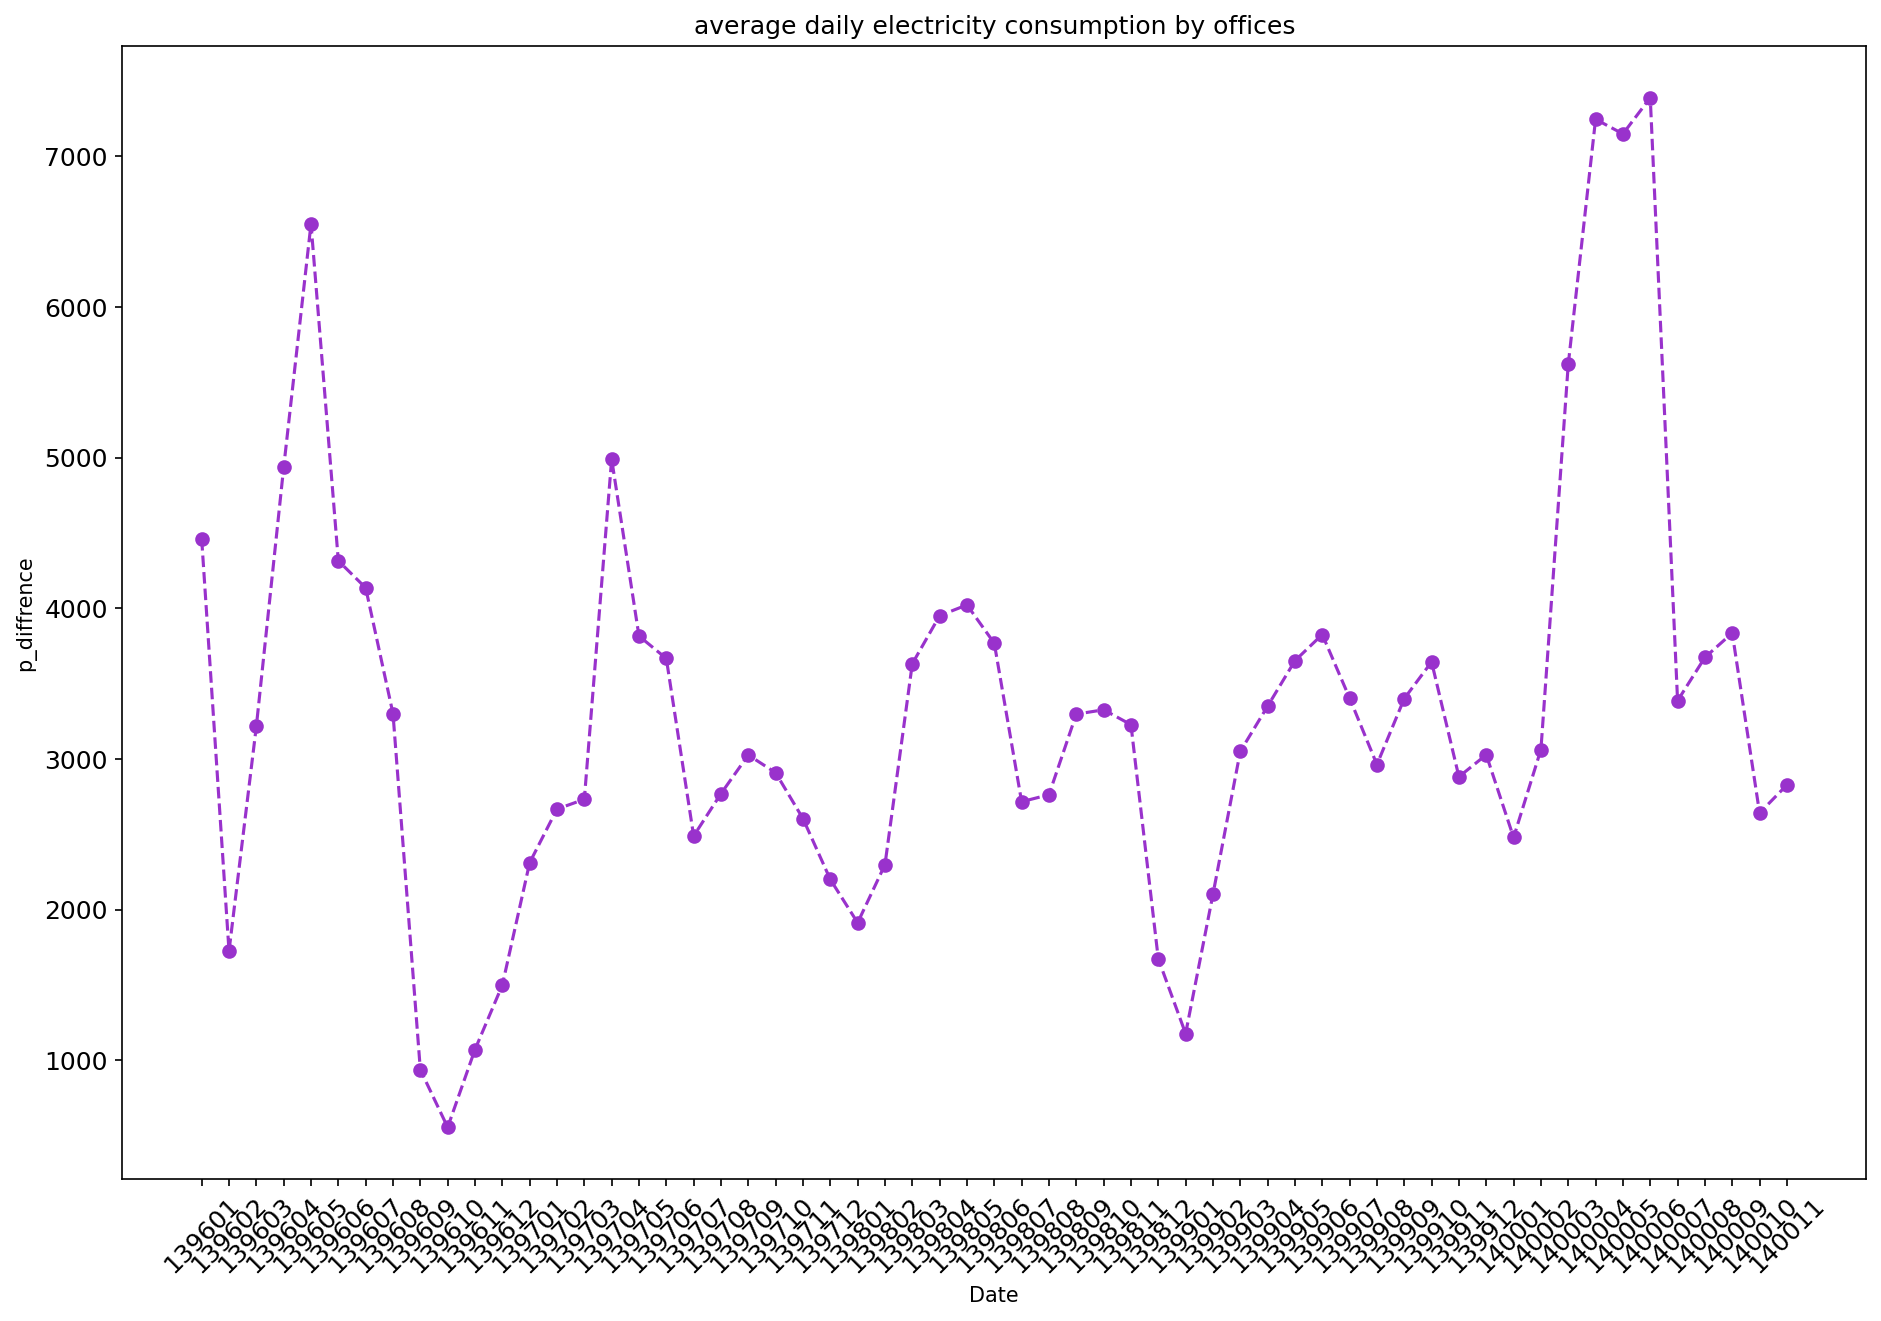

In [412]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(dfm.ym_num,dfm.p_diffrence,c='darkorchid',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('p_diffrence')
plt.title('average daily electricity consumption by offices')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

<span style='color:olive'>حال نمودار متوسط مصرف روزانه برق بر حسب تاریخ را میکشیم </span>

<span style='color:darkblue'>Question 6: </span>

In [413]:
offices=dfm['p_diffrence'].tolist()
offices

[4459.30649630542,
 1724.9210305823217,
 3215.9363636363632,
 4934.274193548386,
 6550.387096774197,
 4314.56451612903,
 4135.334042553193,
 3300.261790780143,
 937.452651515152,
 555.3863636363676,
 1071.4294670846357,
 1498.6871921182246,
 2311.0690476190503,
 2666.8817733990145,
 2731.9608294930877,
 4989.5714285714275,
 3815.3699999999953,
 3666.349078341009,
 2488.4904761904763,
 2769.4595238095244,
 3025.9309523809497,
 2908.1142857142877,
 2603.828571428574,
 2200.2372742200314,
 1912.7107526881737,
 2297.993548387094,
 3631.548387096773,
 3950.5,
 4021.988095238099,
 3767.6018062397416,
 2715.857142857145,
 2762.4597701149396,
 3297.0984126984113,
 3325.914285714287,
 3227.4071428571406,
 1673.319834183676,
 1176.9579761904788,
 2100.9672619047633,
 3049.6752873563237,
 3349.6497695852595,
 3651.543778801839,
 3825.55529953917,
 3403.46507936508,
 2962.427777777775,
 3400.3904761904705,
 3643.739523809527,
 2881.5811111111107,
 3027.390849673204,
 2478.5188397939855,
 3061.9792

<span style='color:olive'>  سهم ادارات از مصرف پیک را از دیتا فریم بالا بدست میاوریم و در لیست جدیدی میریزیم</span>

In [414]:
P=df[['date_pr','p']]
P

,date_pr,p
0,1396/01/01,26416.0
1,1396/01/02,26645.0
2,1396/01/03,27120.0
3,1396/01/04,26722.0
4,1396/01/05,27915.0
...,...,...
1688,1400/11/13,41236.0
1689,1400/11/14,40168.0
1690,1400/11/15,37405.0
1691,1400/11/16,41165.0


<span style='color:olive'>  از دیتا فریم (دی اف) مقدار توان مصرفی در پیک  را استخراج کرده ایم که بتونیم کل نیاز مصرف در پیک را در هر ماه ازش بدست بیاوریم</span>

In [415]:
P['date_pr']=P['date_pr'].apply(lambda x: int(x[:4])*100+int(x[5:7]))
P

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/523179059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['date_pr']=P['date_pr'].apply(lambda x: int(x[:4])*100+int(x[5:7]))


,date_pr,p
0,139601,26416.0
1,139601,26645.0
2,139601,27120.0
3,139601,26722.0
4,139601,27915.0
...,...,...
1688,140011,41236.0
1689,140011,40168.0
1690,140011,37405.0
1691,140011,41165.0


<span style='color:olive'>  در این قسمت تاریخ هر روز را به سال و ماه آن روز تغییر داده ایم </span>

In [416]:
P=P.groupby('date_pr')['p'].agg(['sum'])
total_p=P['sum'].tolist()
total_p

[921909.0,
 1221911.0,
 1391599.0,
 1559659.0,
 1633369.0,
 1503948.0,
 1170543.0,
 1055467.0,
 1062573.0,
 1052932.0,
 1024676.0,
 994251.0,
 1027582.0,
 1099096.0,
 1413447.0,
 477617.0,
 1328644.0,
 1457405.0,
 1210030.0,
 1025115.0,
 1018150.0,
 1042464.0,
 1031798.0,
 1005471.0,
 981034.0,
 1209168.0,
 1504235.0,
 580461.0,
 740208.0,
 1426889.0,
 1306281.0,
 1045088.0,
 1091670.0,
 1109901.0,
 1118356.0,
 1016453.0,
 816271.0,
 1127541.0,
 1502038.0,
 1722428.0,
 1734854.0,
 1588236.0,
 1306930.0,
 1155454.0,
 1158211.0,
 1184177.0,
 1171344.0,
 1161605.0,
 1202756.0,
 1455471.0,
 1740563.0,
 1935746.0,
 1926331.0,
 1827379.0,
 1185038.0,
 1225372.0,
 1213821.0,
 1203542.0,
 686445.0]

<span style='color:olive'>  حال مقادیری که در یک ماه و یک سال هستند را جمع میزنیم تا کل نیاز مصرف در هر ماه حساب شود</span>

In [417]:
percentage=[offices[i]/total_p[i] for i in range(len(total_p))]
percentage

[0.004837035430075441,
 0.001411658484605116,
 0.002310964842340619,
 0.0031636878276266713,
 0.0040103535066321186,
 0.002868825595119665,
 0.0035328339433520965,
 0.0031268261260467105,
 0.0008822477622856519,
 0.0005274665065135903,
 0.0010456275613800223,
 0.001507352964310043,
 0.0022490361329986805,
 0.0024264320618026217,
 0.001932835705543319,
 0.010446804507736173,
 0.0028716270122019108,
 0.002515669342661106,
 0.0020565527104207965,
 0.002701608623236929,
 0.0029719893457554876,
 0.0027896544012208455,
 0.002523583658263123,
 0.0021882652749010477,
 0.0019496885456448743,
 0.001900474994696431,
 0.0024142161212156164,
 0.006805797460983597,
 0.005433591767770815,
 0.002640430899838559,
 0.0020790757446959305,
 0.002643279580394129,
 0.0030202335987051135,
 0.002996586439434046,
 0.0028858495352617063,
 0.0016462343405781437,
 0.0014418716041492087,
 0.0018633178411292923,
 0.0020303582781236716,
 0.0019447255673881634,
 0.0021048133034836584,
 0.002408681895851227,
 0.002604

<span style='color:olive'>در این قسمت بسته به ماه های سال های داده شده، نسبت مصرف برق ادارات به کل را حساب کرده ایم </span>

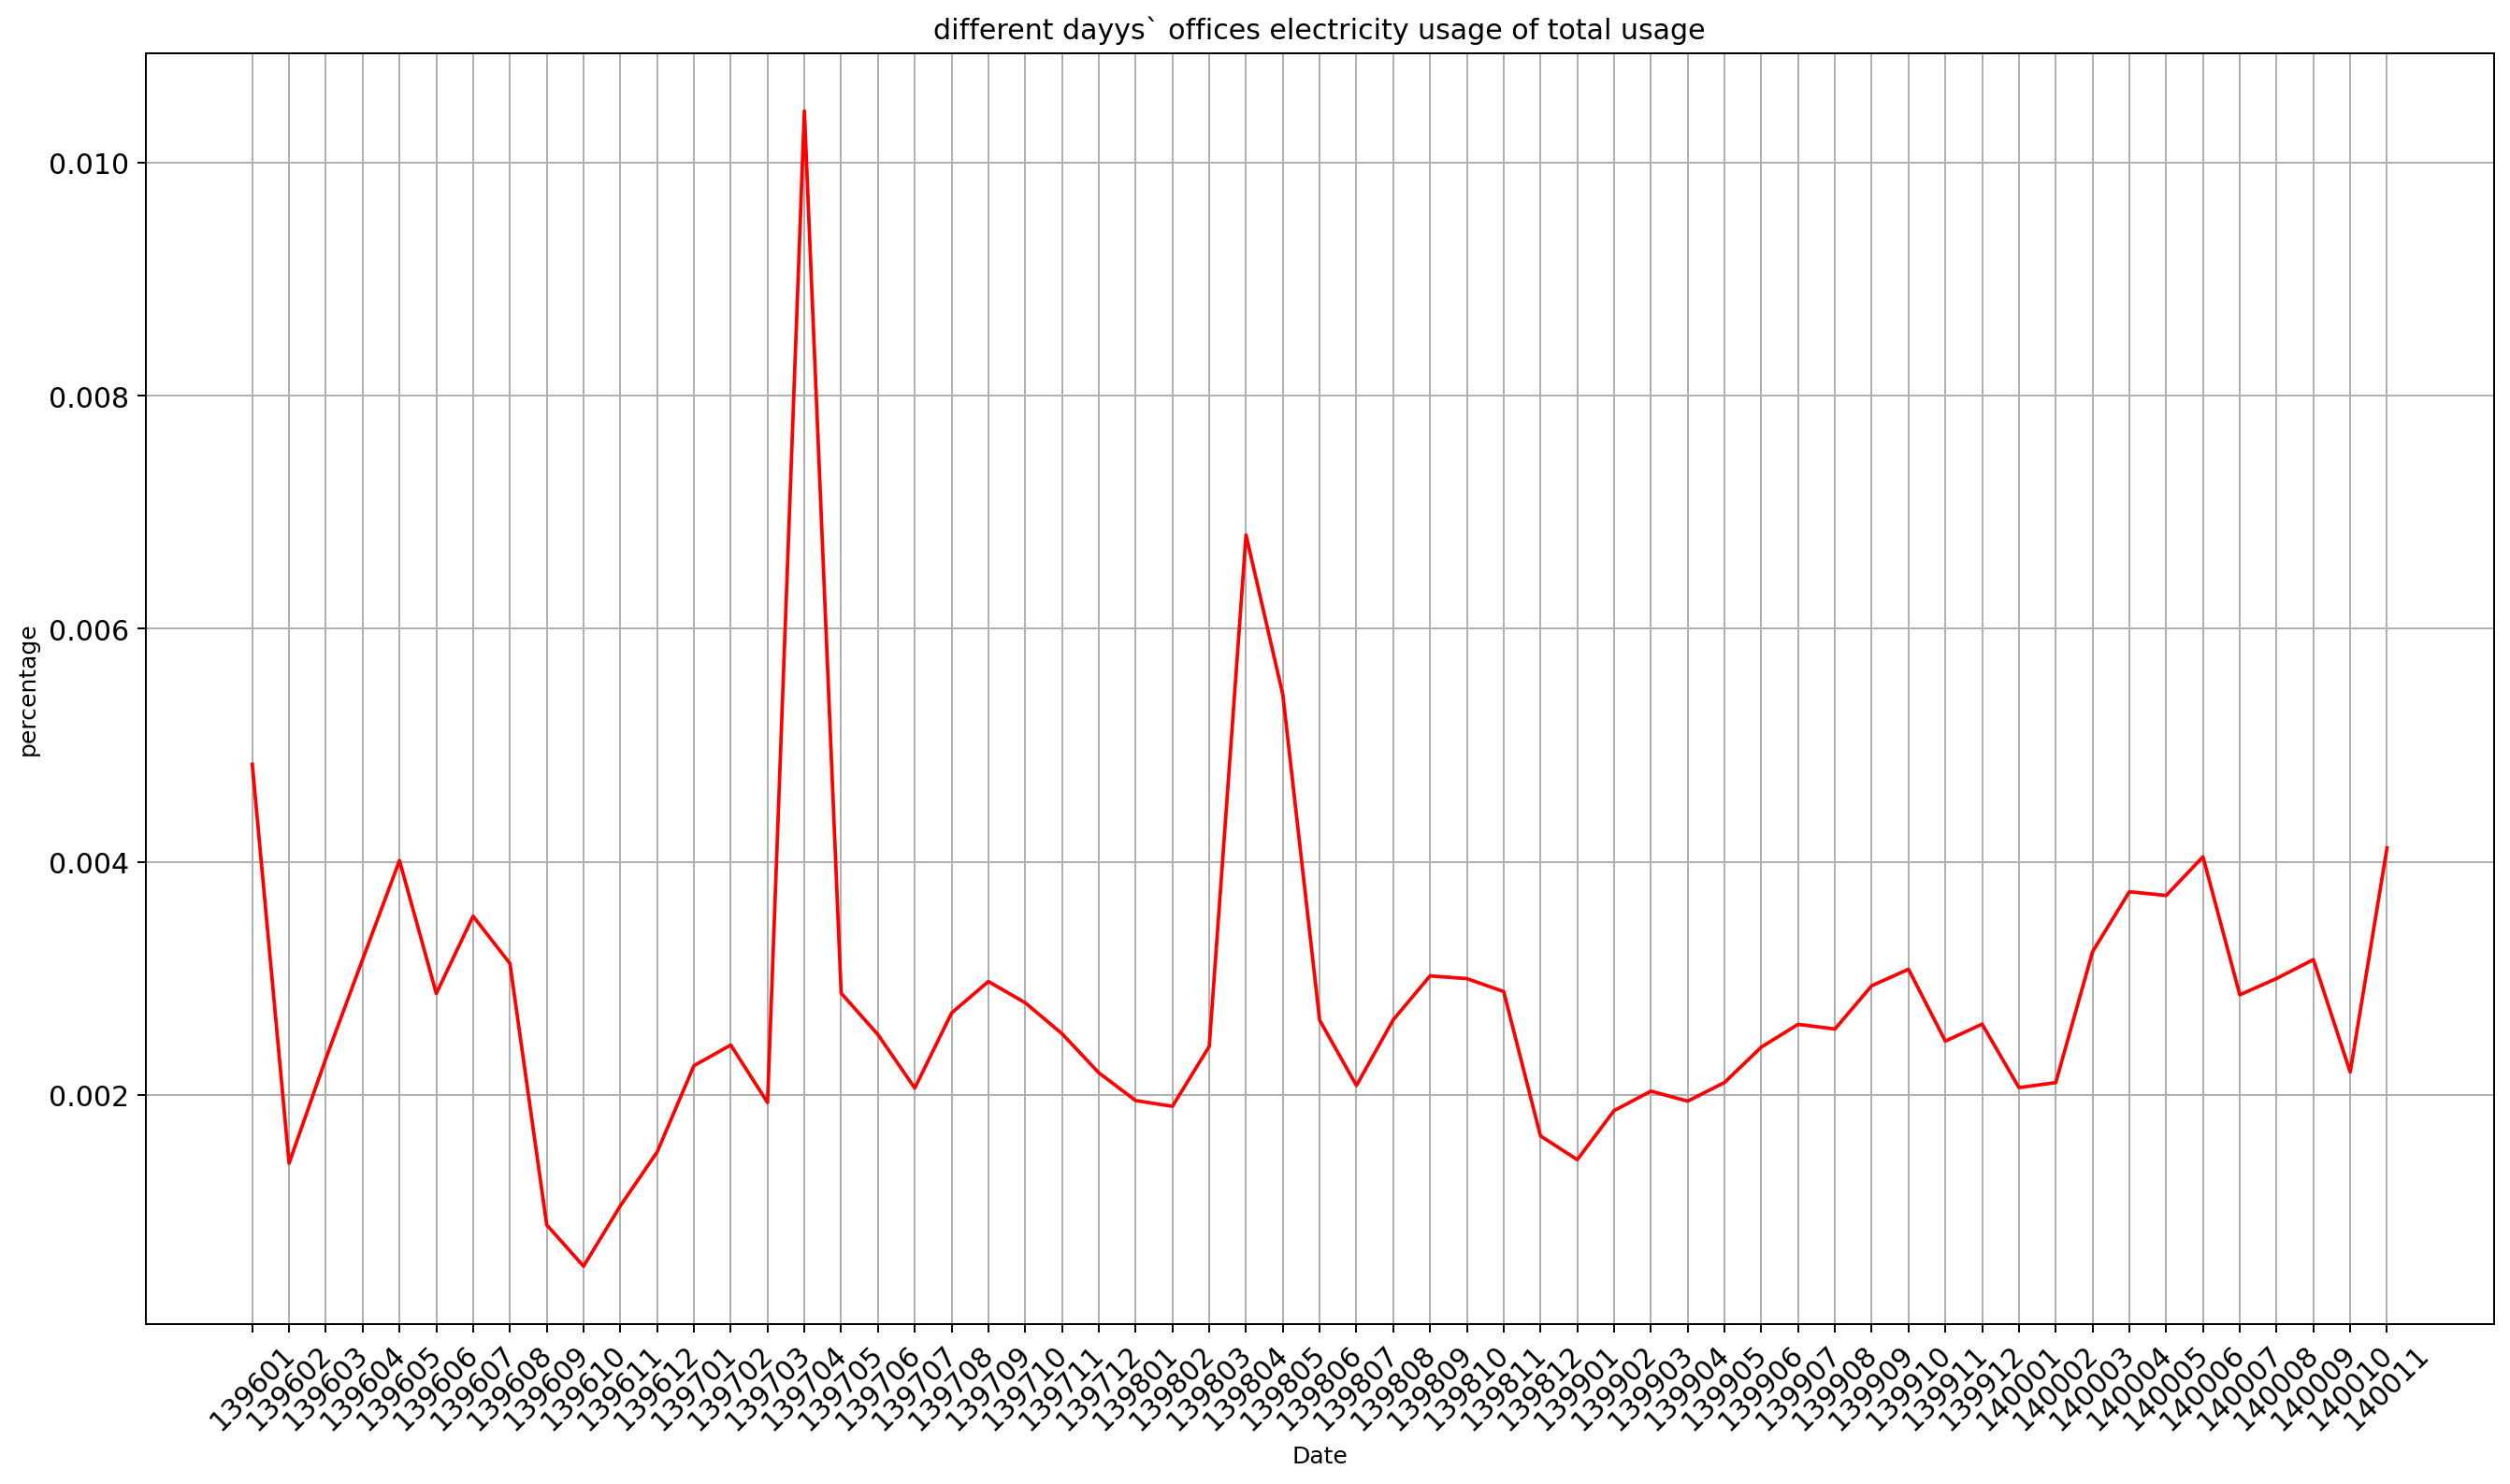

In [418]:
plt.figure(figsize=(18,10),dpi=180)
plt.plot(dfm.ym_num,percentage, color='r')
plt.grid()
plt.xlabel('Date')
plt.ylabel('percentage')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.title('different dayys` offices electricity usage of total usage')
plt.show()


<span style='color:olive'>این نسبت را بر روی زمان نمودار کرده ایم </span>

<span style='color:seagreen'>در سال هاری 1397 و 1398 در ماه تیر صعود داشته اند. ولی در سال 1400 این مقدار افزایش درصد نداشته است</span>

# Part 6:

<span style='color:darkblue'>Question 1: </span>

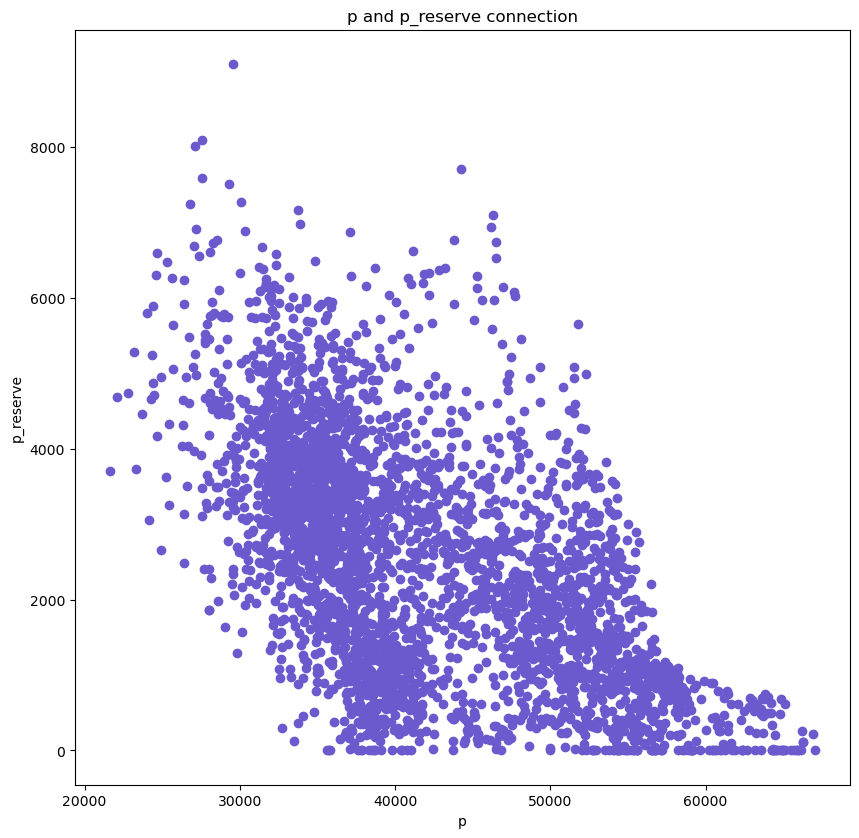

In [419]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p,d.p_reserve,c='slateblue')
plt.xlabel("p",fontsize=10)
plt.ylabel("p_reserve",fontsize=10)
plt.title('p and p_reserve connection')
plt.show()

<span style='color:seagreen'>بله.میتوان  دید که نمودار تا حد زیادی نزولی است که به این معنا است که با افزایش مصرف، ذخیره نیروگاه کاهش میابد </span>

<span style='color:darkblue'>Question 2: </span>

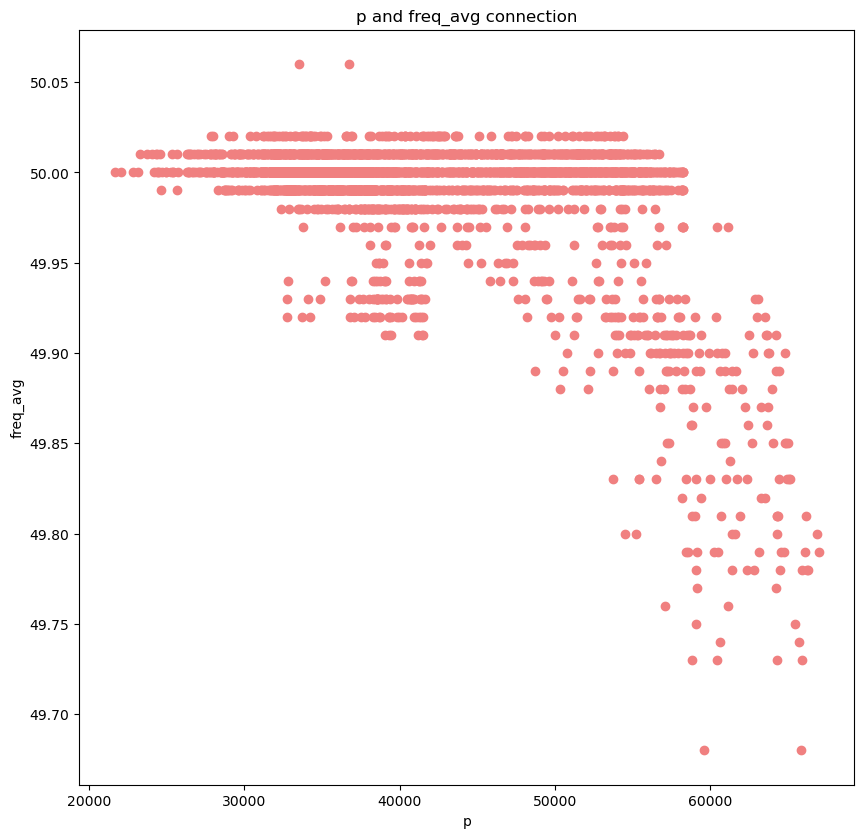

In [420]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p,d.freq_avg,c='lightcoral')
plt.xlabel("p",fontsize=10)
plt.ylabel("freq_avg",fontsize=10)
plt.title('p and freq_avg connection')
plt.show()


<span style='color:seagreen'> با بررسی نمودار میتوان گفت این گزاره درست است. چرا که با افزایش مصرف، میتوان دید که متوسط فرکانس کاهش یافته </span>

<span style='color:darkblue'>Question 3: </span>

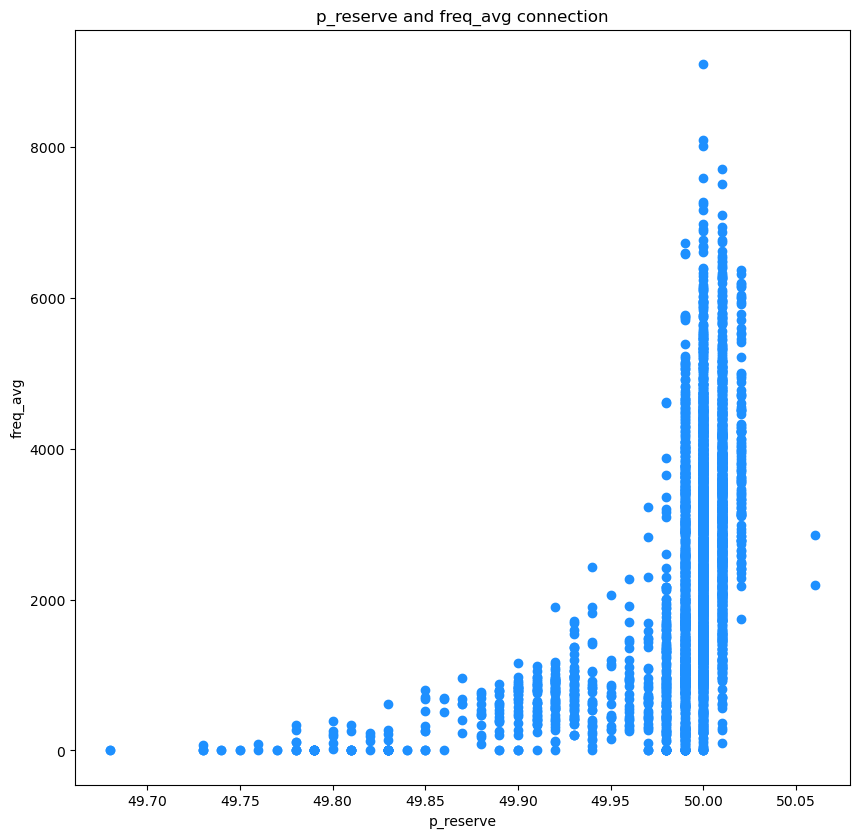

In [421]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.freq_avg,d.p_reserve,c='dodgerblue')
plt.xlabel("p_reserve",fontsize=10)
plt.ylabel("freq_avg",fontsize=10)
plt.title('p_reserve and freq_avg connection')
plt.show()

<span style='color:seagreen'>میتوان دید هنگامی که دخیره نیروگاه ها کم است، با افت فرکانس روبرو میشویم. اما نمیتوان گفت که فقط هنگامی که دخیره نیروگاه ها کم است، فرکانس کاهش میابد، چرا که میتوان دید که زمان های متعددی شاهد افت فرکانس هستیم در صورتی که ذخیره نیروگاه ها زیاد است    </span>

<span style='color:darkblue'>Question 4: </span>

In [422]:
d['s']=(d['m']/3.1).astype('int64') +1

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/4118935593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['s']=(d['m']/3.1).astype('int64') +1


<span style='color:olive'>با توجه به ماه هر دیتا، فصل آن رو را در آوردیم </span>

In [423]:
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber,s
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323,1400.882,18,1841,4
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12,1234,4
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322,1400.880,18,1846,4
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11,1145,4
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321,1400.877,19,1900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,3518,1396/01/03,12:43,23705.0,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12,1243,1
3518,3519,1396/01/02,20:17,26645.0,NaN,4044,3565,0,50.00,1396,1,2,2,1396.005,20,2017,1
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12,1209,1
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1,1396.003,19,1953,1


<span style='color:olive'>برای چک کردن دیتافریم</span>

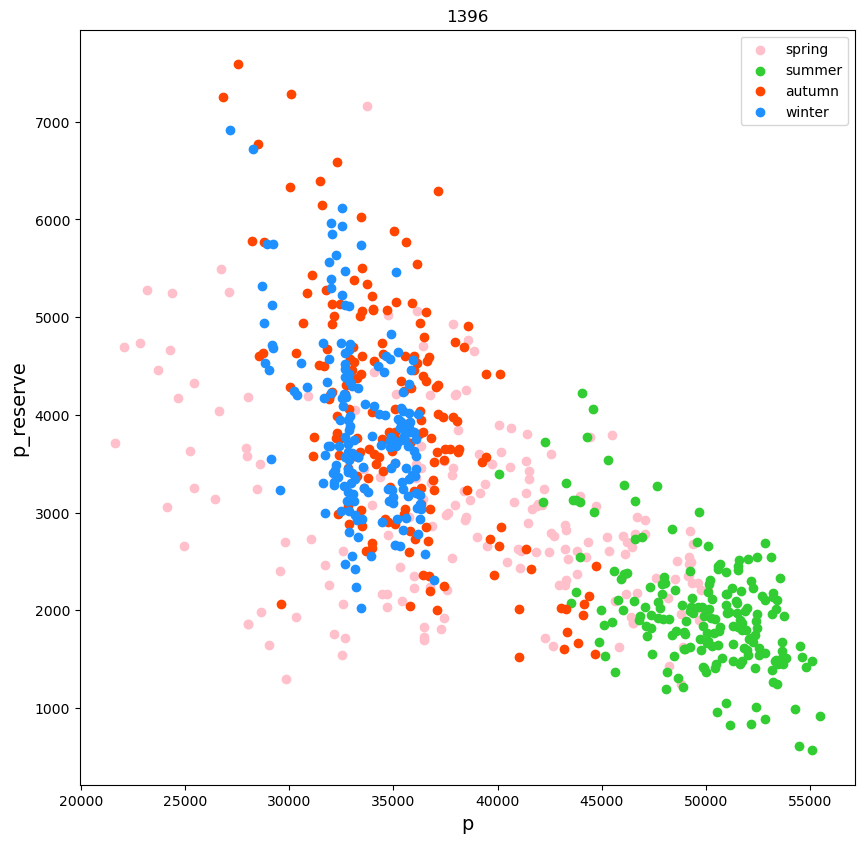

In [424]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p[d['y']==1396][d.s==1],d.p_reserve[d['y']==1396][d.s==1],c='pink',label='spring')
plt.scatter(d.p[d['y']==1396][d.s==2],d.p_reserve[d['y']==1396][d.s==2],c='limegreen',label='summer')
plt.scatter(d.p[d['y']==1396][d.s==3],d.p_reserve[d['y']==1396][d.s==3],c='orangered',label='autumn')
plt.scatter(d.p[d['y']==1396][d.s==4],d.p_reserve[d['y']==1396][d.s==4],c='dodgerblue',label='winter')
plt.legend()
plt.xlabel("p",fontsize=14)
plt.ylabel("p_reserve",fontsize=14)
plt.title('1396')
plt.show()

<span style='color:seagreen'>درتابستان سال 1396 در مقدار مصرف 55000، ذخیره نیروگاه هاه صفر شده است </span>

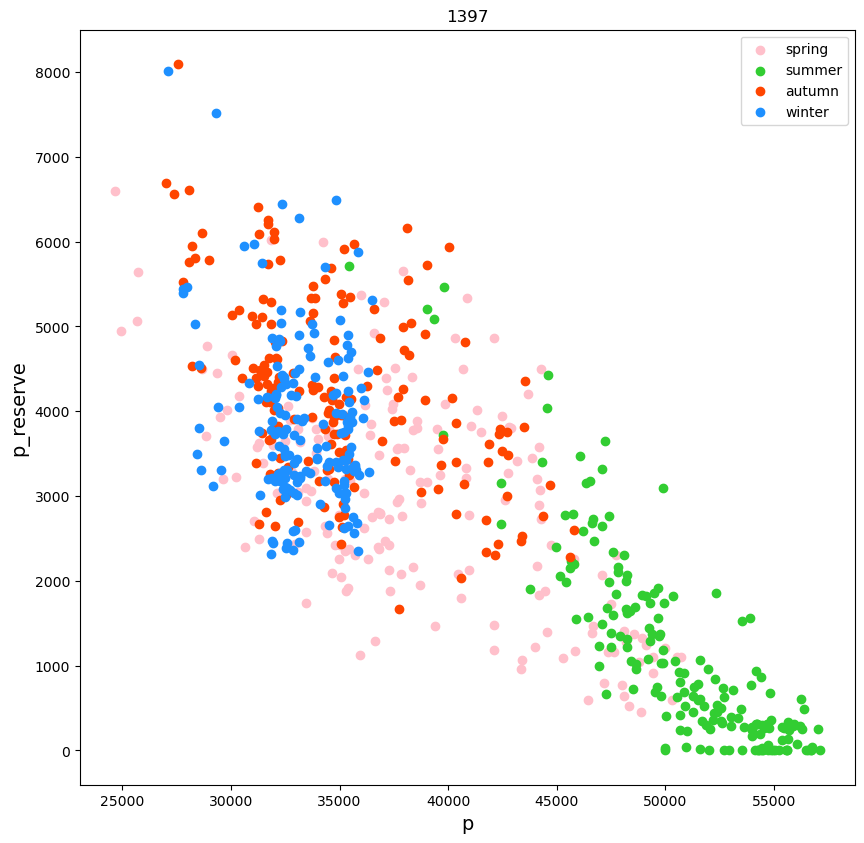

In [425]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p[d['y']==1397][d.s==1],d.p_reserve[d['y']==1397][d.s==1],c='pink',label='spring')
plt.scatter(d.p[d['y']==1397][d.s==2],d.p_reserve[d['y']==1397][d.s==2],c='limegreen',label='summer')
plt.scatter(d.p[d['y']==1397][d.s==3],d.p_reserve[d['y']==1397][d.s==3],c='orangered',label='autumn')
plt.scatter(d.p[d['y']==1397][d.s==4],d.p_reserve[d['y']==1397][d.s==4],c='dodgerblue',label='winter')
plt.legend()
plt.xlabel("p",fontsize=14)
plt.ylabel("p_reserve",fontsize=14)
plt.title('1397')
plt.show()

<span style='color:seagreen'>درتابستان سال 1397 در مقدار مصرف 55000، ذخیره نیروگاه هاه صفر شده است و در بهار این سال نیز در مصرف 50000، دخیره نزدیک صفر شده است </span>

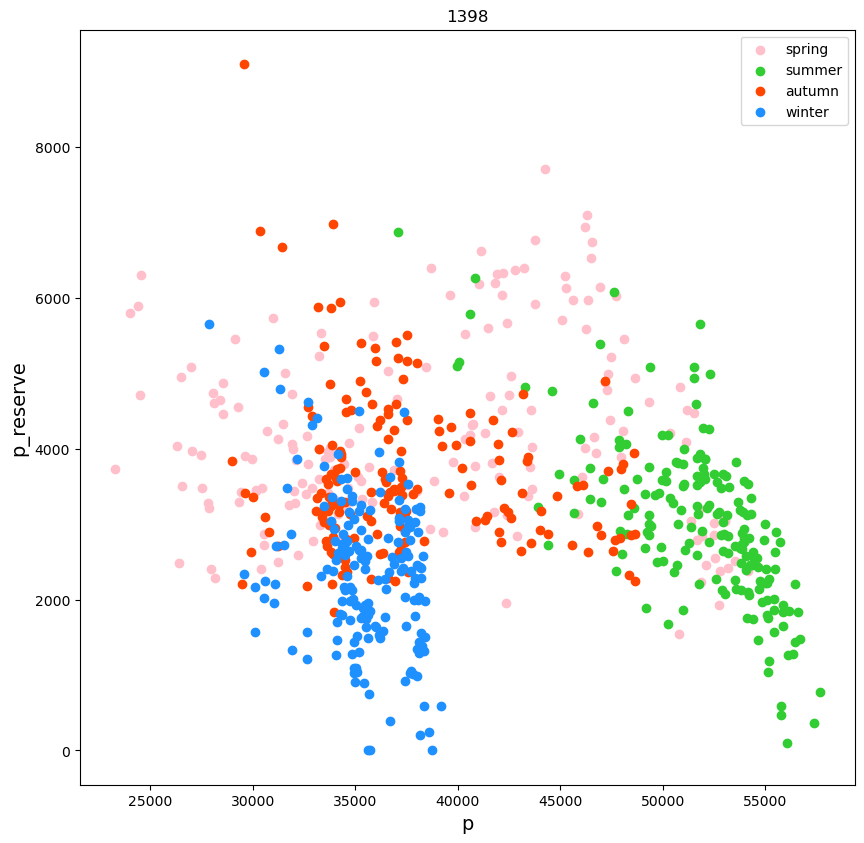

In [426]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p[d['y']==1398][d.s==1],d.p_reserve[d['y']==1398][d.s==1],c='pink',label='spring')
plt.scatter(d.p[d['y']==1398][d.s==2],d.p_reserve[d['y']==1398][d.s==2],c='limegreen',label='summer')
plt.scatter(d.p[d['y']==1398][d.s==3],d.p_reserve[d['y']==1398][d.s==3],c='orangered',label='autumn')
plt.scatter(d.p[d['y']==1398][d.s==4],d.p_reserve[d['y']==1398][d.s==4],c='dodgerblue',label='winter')
plt.legend()
plt.xlabel("p",fontsize=14)
plt.ylabel("p_reserve",fontsize=14)
plt.title('1398')
plt.show()

<span style='color:seagreen'>درتابستان و زمستان سال 1398 (به ترتیب) در مقادیر مصرف بالای 55000 و بین 35000 و 40000، ذخیره نیروگاه هاه صفر شده است </span>

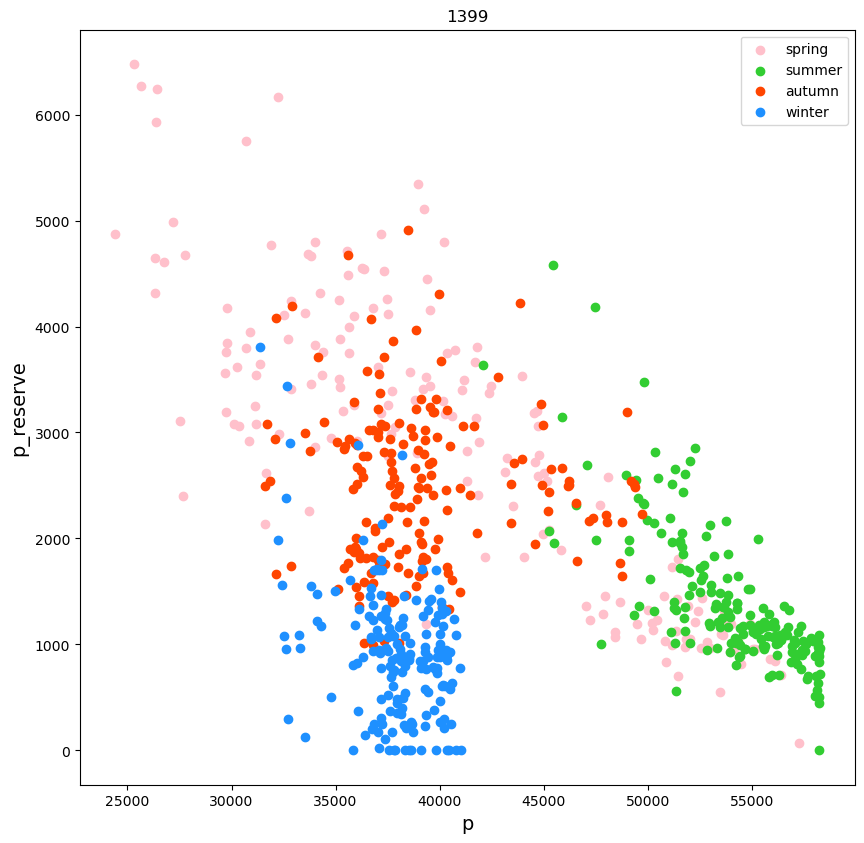

In [427]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p[d['y']==1399][d.s==1],d.p_reserve[d['y']==1399][d.s==1],c='pink',label='spring')
plt.scatter(d.p[d['y']==1399][d.s==2],d.p_reserve[d['y']==1399][d.s==2],c='limegreen',label='summer')
plt.scatter(d.p[d['y']==1399][d.s==3],d.p_reserve[d['y']==1399][d.s==3],c='orangered',label='autumn')
plt.scatter(d.p[d['y']==1399][d.s==4],d.p_reserve[d['y']==1399][d.s==4],c='dodgerblue',label='winter')
plt.legend()
plt.xlabel("p",fontsize=14)
plt.ylabel("p_reserve",fontsize=14)
plt.title('1399')
plt.show()

<span style='color:seagreen'>درتابستان و بهار سال 1399 در مقدار مصرف بالای 55000، ذخیره نیروگاه هاه صفر شده است. همچنین در زمستان و مقدار مصرف بین 35000 و 42500، دخیره نیروگاه ها صفر شده است </span>

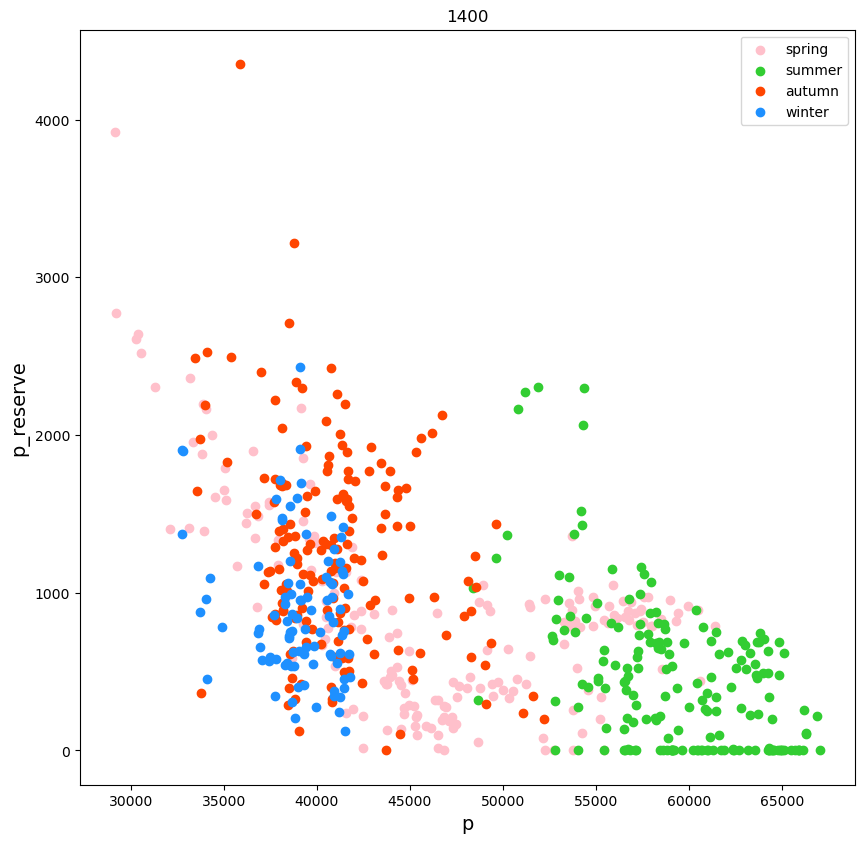

In [428]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(d.p[d['y']==1400][d.s==1],d.p_reserve[d['y']==1400][d.s==1],c='pink',label='spring')
plt.scatter(d.p[d['y']==1400][d.s==2],d.p_reserve[d['y']==1400][d.s==2],c='limegreen',label='summer')
plt.scatter(d.p[d['y']==1400][d.s==3],d.p_reserve[d['y']==1400][d.s==3],c='orangered',label='autumn')
plt.scatter(d.p[d['y']==1400][d.s==4],d.p_reserve[d['y']==1400][d.s==4],c='dodgerblue',label='winter')
plt.legend()
plt.xlabel("p",fontsize=14)
plt.ylabel("p_reserve",fontsize=14)
plt.title('1400')
plt.show()

<span style='color:seagreen'>درهر چهار فصل سال 1400 در مقادیر مصرف بین 40000 و بالای 70000، ذخیره نیروگاه هاه صفر شده است </span>

 <span style='color:seagreen'> در تابستان های 5 سال اخیر بین مقادیر 50000 تا 65000 مگاوات ذخیره ی نیروگاه بعضا 0 شده است و در زمستان سال 1398و1399 بین مقادیر 35000 تا 40000 مگاوات ذخیره ی نیروگاه صفر شده است و همچنین در روز های معدودی بهار 1400 بین 40000 تا 50000 مگاوات ذخیره ی نیروگاه 0 گشته است --- بله متفاوت است زیرا در فصل های سرد به علت استفاده ی سوخت فسیلی برای گرمایش ذخیره ی نیروگاه کاهش یافته است</span>

<span style='color:olive'>بله، این مقادیر عمدتا تفاوت دارد برای سال ها و فصل های مختلف</span>

<span style='color:darkblue'>Question 5: </span>

In [429]:
d['widespread_off'] = 0

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/2795693484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['widespread_off'] = 0


<span style='color:olive'>در این قسمت ابتدا ستون جدید اضافه کردیم و برابر صفر گذاشتیم. سپس مقدار این ستون را به 1 تغییر دادیم اگر داده در شرط مسئله صدق میکرد  </span>

In [430]:
d['widespread_off'].loc[(d['p_reserve']<=0 )*(d['freq_avg']<49.99)]=1

C:\Users\EMERTAT\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [431]:
d

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber,s,widespread_off
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323,1400.882,18,1841,4,0
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12,1234,4,0
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322,1400.880,18,1846,4,0
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11,1145,4,0
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321,1400.877,19,1900,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,3518,1396/01/03,12:43,23705.0,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12,1243,1,0
3518,3519,1396/01/02,20:17,26645.0,NaN,4044,3565,0,50.00,1396,1,2,2,1396.005,20,2017,1,0
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12,1209,1,0
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1,1396.003,19,1953,1,0


<span style='color:olive'>برای اطمینان از درستی داده ها </span>

<span style='color:darkblue'>Question 6: </span>


In [432]:
dm_widespread_off = d[d['widespread_off']==1].groupby(['y','m']).p.agg([min,max])
dm_widespread_off

min      max
y    m                   
1397 4   52922.0  56468.0
1399 5   58220.0  58220.0
     10  35816.0  41016.0
1400 2   52265.0  52745.0
     3   53747.0  55408.0
     4   61714.0  65918.0
     5   57119.0  67012.0
     6   52789.0  64953.0
     8   43709.0  43709.0

<span style='color:olive'>با توجه به سال و ماه مقدار را تفکیک کرده ایم و بیشترین و کمترین مقدار پیک را بدست آورده ایم </span>

<span style='color:darkblue'>Question 7: </span>

In [433]:
dm_widespread_off.loc[1400].loc[5]

min    57119.0
max    67012.0
Name: 5, dtype: float64

<span style='color:olive'>بازه ی توان مصرفی که در آن شاهد خاموشی مرداد 1400 بودیم </span>

In [434]:
dm_widespread_off.loc[1400,5]-dfm.loc[1400,5].p_diffrence

min    49971.278802
max    59864.278802
Name: (1400, 5), dtype: float64

<span style='color:olive'>در این ماه، از مقدار کمترین و بیشترین پیک مقدار مصرف برق ادارات را کم میکنیم تا بازه جدیدی بدست آید  </span>

In [435]:
dm_widespread_off['p_min_without_office']=dm_widespread_off.loc[:,'min'] - dfm.p_diffrence.loc[dm_widespread_off.index]
dm_widespread_off['p_max_without_office']=dm_widespread_off.loc[:,'max'] - dfm.p_diffrence.loc[dm_widespread_off.index]
dm_widespread_off

min      max  p_min_without_office  p_max_without_office
y    m                                                               
1397 4   52922.0  56468.0          47932.428571          51478.428571
1399 5   58220.0  58220.0          54568.456221          54568.456221
     10  35816.0  41016.0          32172.260476          37372.260476
1400 2   52265.0  52745.0          49203.020737          49683.020737
     3   53747.0  55408.0          48128.506912          49789.506912
     4   61714.0  65918.0          54469.041475          58673.041475
     5   57119.0  67012.0          49971.278802          59864.278802
     6   52789.0  64953.0          45401.387097          57565.387097
     8   43709.0  43709.0          40035.686667          40035.686667

 <span style='color:olive'> در این قسمت با توجه به سخنان آقای امانی صرفا روی مقادیر ماکس و مین هر ماه بررسی انجام داده ایم و بررسی به این گونه است که از پیک مینیمم و ماکسیمم هر ماه مصرف میانگین ادارات در آن ماه را از آن کم کرده ایم و اگر پیک ماکسیمم با تعطیلی ادارات کمتر از پیک مینیمم مصرف در حالت عادی شد به طور قطع می توان گفت تعطیلی ادارات در آن ماه مشکل خاموشی گسترده را در همه ی روزهای آن ماه حل می کند ولی اگر کمتر نشد صرفا مشکل خاموشی در بعضی روز ها آن ماه را حل میکند </span>

<span style='color:seagreen'> خیر، به طور کلی تاثیر ندارد و مشکل خاموشی در این ماه را حل نمیکند، اما در روز هایی میتواند تاثیرگذار باشد و مشکل خاموشی بعضی روز ها را حل کند
به طور مثال در روز 25/05/1400 اگر ادارات تعطیل باشند، قطعی برق نخواهیم داشت</span>

:راه حل دقیق تر برای پیدا کردن روز هایی که تعطیلی ادارات مشکل خاموشی را رفع میکند

In [436]:
df['widespread_off']=0
df['widespread_off'].loc[(df['p_reserve']<=0 )*(df['freq_avg']<49.99)]=1
df['p_office']=0
for i in dfm.index.tolist():
    df['p_office'].loc[(df.y==i[0])*(df.m==i[1])]=dfm.p_diffrence.loc[i]  
df['p_without_office']=df.p-df.p_office
df['widespread_off2']=df['widespread_off']
for i in dfm.loc[dm_widespread_off.index].index.tolist():
    df.widespread_off2.loc[(df.holiday_inCal==0)*(df.y==i[0])*(df.m==i[1])*((dm_widespread_off['min'].loc[i])>(df.p_without_office))]=0 

C:\Users\EMERTAT\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [437]:
df[df.widespread_off==1][df.widespread_off2==0]

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/4238559210.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.widespread_off==1][df.widespread_off2==0]


,date_pr,weekday_fa,holiday_inCal,date_gr,weekday_en,r,date,time,p_lastyear,p_reserve,...,timenumber,p,dayafter_holiday_inCal,daybefore_holiday_inCal,p_holiday_interpolated,p_working_interpolated,widespread_off,p_office,p_without_office,widespread_off2
459,1397/04/30,شنبه,0.0,2018-07-21,Saturday,2561,1397/04/30,15:09,46850.0,0,...,1509,56468.0,0.0,0.0,NaN,56468.0,1,4989.571429,51478.428571,0
1432,1400/02/28,سه شنبه,0.0,2021-05-18,Tuesday,522,1400/02/28,15:10,NaN,0,...,1510,52745.0,0.0,0.0,NaN,52745.0,1,3061.979263,49683.020737,0
1436,1400/03/01,شنبه,0.0,2021-05-22,Saturday,514,1400/03/01,14:30,44538.0,0,...,1430,55408.0,1.0,0.0,NaN,55408.0,1,5618.493088,49789.506912,0
1474,1400/04/08,سه شنبه,0.0,2021-06-29,Tuesday,438,1400/04/08,12:55,53934.0,0,...,1255,64434.0,0.0,0.0,NaN,64434.0,1,7244.958525,57189.041475,0
1479,1400/04/13,یکشنبه,0.0,2021-07-04,Sunday,428,1400/04/13,12:52,50280.0,0,...,1252,65918.0,0.0,0.0,NaN,65918.0,1,7244.958525,58673.041475,0
1522,1400/05/25,دوشنبه,0.0,2021-08-16,Monday,342,1400/05/25,13:41,55804.0,0,...,1341,62671.0,0.0,0.0,NaN,62671.0,1,7147.721198,55523.278802,0
1549,1400/06/21,یکشنبه,0.0,2021-09-12,Sunday,288,1400/06/21,12:50,47748.0,0,...,1250,56568.0,0.0,0.0,NaN,56568.0,1,7387.612903,49180.387097,0
1550,1400/06/22,دوشنبه,0.0,2021-09-13,Monday,286,1400/06/22,14:20,53017.0,0,...,1420,57162.0,0.0,0.0,NaN,57162.0,1,7387.612903,49774.387097,0
1551,1400/06/23,سه شنبه,0.0,2021-09-14,Tuesday,284,1400/06/23,12:40,52571.0,0,...,1240,56525.0,0.0,0.0,NaN,56525.0,1,7387.612903,49137.387097,0
1557,1400/06/29,دوشنبه,0.0,2021-09-20,Monday,272,1400/06/29,14:10,50310.0,0,...,1410,54049.0,0.0,0.0,NaN,54049.0,1,7387.612903,46661.387097,0


<span style='color:olive'> بعد از اسکرول کردن وارنینگ ها، دیتافریم قرار دارد. ستون تاریخ های این دیتافریم بیانگر روز هاییست که خاموشی رخ داده ولی در صورت تعطیلی ادارات، شاهد خاموشی نبودیم </span>

***

# Part 7:

<span style='color:darkblue'>Question 1:</span>

In [438]:
d.groupby(['y','m'])['widespread_off'].sum()

y     m 
1396  1      0
      2      0
      3      0
      4      0
      5      0
      6      0
      7      0
      8      0
      9      0
      10     0
      11     0
      12     0
1397  1      0
      2      0
      3      0
      4      2
      5      0
      6      0
      7      0
      8      0
      9      0
      10     0
      11     0
      12     0
1398  1      0
      2      0
      3      0
      4      0
      5      0
      6      0
      7      0
      8      0
      9      0
      10     0
      11     0
      12     0
1399  1      0
      2      0
      3      0
      4      0
      5      1
      6      0
      7      0
      8      0
      9      0
      10     8
      11     0
      12     0
1400  1      0
      2      2
      3      2
      4      6
      5     21
      6     25
      7      0
      8      1
      9      0
      10     0
      11     0
Name: widespread_off, dtype: int64

<span style='color:olive'>بعد از تفکیک کردن بر اساس ماه و سال ماهی که بیشتر از همه شرایط احتمالی خاموشی را دارد را پیدا میکنیم </span>

 <span style='color:olive'>در ماه های دی 1399 و در ماه تیر و مرداد و شهریور 1400 شبکه بحرانی ترین وضعیت خود را تجربه کرده است  </span>

<span style='color:darkblue'>Question 2: </span>

In [439]:
d['per_renewable']=(d.p_renewable)/(d.p)*100
d

C:\Users\EMERTAT\AppData\Local\Temp/ipykernel_14416/2107087328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['per_renewable']=(d.p_renewable)/(d.p)*100


,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,y,m,d,n_days,date_num,h,timenumber,s,widespread_off,per_renewable
0,1,1400/11/17,18:41,41666.0,36826.0,991,5045,3920,49.93,1400,11,17,323,1400.882,18,1841,4,0,9.408151
1,2,1400/11/17,12:34,39126.0,34105.0,1694,4564,3920,49.93,1400,11,17,323,1400.882,12,1234,4,0,10.018913
2,3,1400/11/16,18:46,41165.0,38563.0,245,5044,4615,49.91,1400,11,16,322,1400.880,18,1846,4,0,11.210980
3,4,1400/11/16,11:45,39032.0,37097.0,628,4967,4615,49.91,1400,11,16,322,1400.880,11,1145,4,0,11.823632
4,5,1400/11/15,19:00,37405.0,39934.0,570,4931,3793,49.93,1400,11,15,321,1400.877,19,1900,4,0,10.140356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,3518,1396/01/03,12:43,23705.0,NaN,4464,3709,0,50.01,1396,1,3,3,1396.008,12,1243,1,0,0.000000
3518,3519,1396/01/02,20:17,26645.0,NaN,4044,3565,0,50.00,1396,1,2,2,1396.005,20,2017,1,0,0.000000
3519,3520,1396/01/02,12:09,22818.0,NaN,4740,3599,0,50.00,1396,1,2,2,1396.005,12,1209,1,0,0.000000
3520,3521,1396/01/01,19:53,26416.0,NaN,3140,3639,0,50.00,1396,1,1,1,1396.003,19,1953,1,0,0.000000


<span style='color:olive'>درصد تامین برق از نیروگاه های تجدید پذیر به کل برق تولید شده را حساب میکنیم</span>

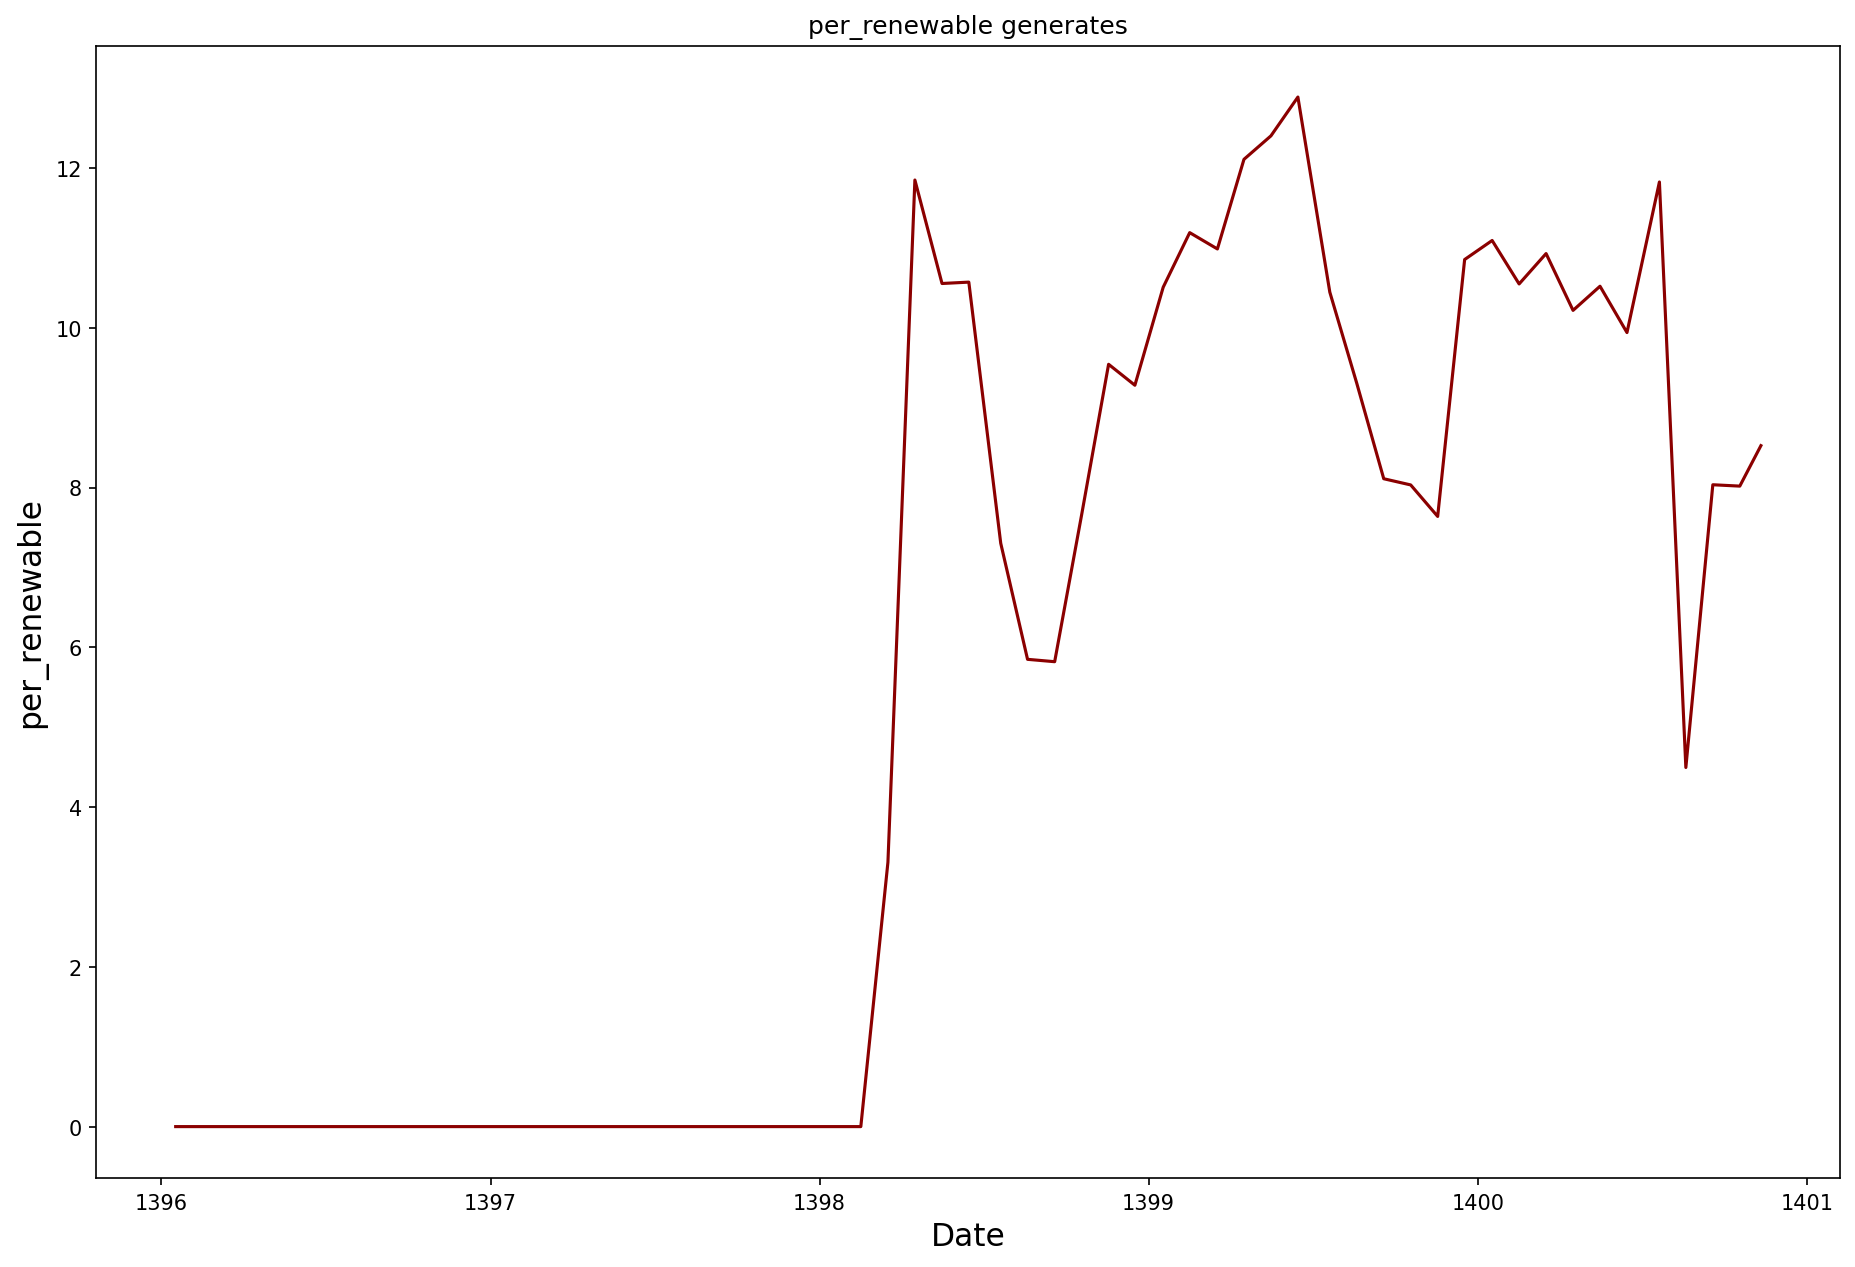

In [440]:
plt.figure(figsize=(15,10),dpi=150)
plt.plot(d.groupby(['y','m'])['date_num'].mean(),d.groupby(['y','m'])['per_renewable'].mean(),color='darkred')
plt.xlabel('Date',fontsize=15)
plt.ylabel('per_renewable',fontsize=15)
plt.title('per_renewable generates')
plt.show()

 <span style='color:seagreen'> در سال های اخیر توانسته حدود 10 درصد کل تولید برق را تامین کند که نشان میدهد با گذشت زمان برق تجدید پذیر سهم بیشتری از پیک مصرفی را تامین کرده است   </span>

<span style='color:seagreen'>در فصل های پاییز و زمستان سال هایی که داده هایش موجود است، این درصد به نسبت کمتر است</span>

<span style='color:darkblue'>Question 3: </span>

In [441]:
ds=d.groupby(['s','y'])['p'].mean()
ds

s  y   
1  1396    38477.716667
   1397    38421.276243
   1398    38779.037838
   1399    40910.819767
   1400    46366.741935
2  1396    49815.370968
   1397    50746.951351
   1398    51725.130435
   1399    53930.069892
   1400    59356.923077
3  1396    35184.077778
   1397    34905.202247
   1398    37502.854749
   1399    39087.655556
   1400    41042.162791
4  1396    33466.596591
   1397    33216.983051
   1398    35493.417143
   1399    37908.005556
   1400    39016.542553
Name: p, dtype: float64

<span style='color:olive'>ابتدا نیاز مصرف را بر اساس فصل ها و سال ها تفکیک میکنیم</span>

In [442]:
ds1=ds.shift(periods=1)
ds1

s  y   
1  1396             NaN
   1397    38477.716667
   1398    38421.276243
   1399    38779.037838
   1400    40910.819767
2  1396    46366.741935
   1397    49815.370968
   1398    50746.951351
   1399    51725.130435
   1400    53930.069892
3  1396    59356.923077
   1397    35184.077778
   1398    34905.202247
   1399    37502.854749
   1400    39087.655556
4  1396    41042.162791
   1397    33466.596591
   1398    33216.983051
   1399    35493.417143
   1400    37908.005556
Name: p, dtype: float64

<span style='color:olive'>حال این مقدار را شیفت میدهیم تا بتوانیم با مقدار نیاز سال پیش مقایسه کنیم</span>

In [443]:
per_p2season=(ds/ds1*100)-100
per_p2season=per_p2season.drop(index=[(1,1396),(2,1396),(3,1396),(4,1396)])
per_p2season

s  y   
1  1397    -0.146683
   1398     0.931155
   1399     5.497253
   1400    13.336135
2  1397     1.870066
   1398     1.927562
   1399     4.262801
   1400    10.062759
3  1397    -0.792619
   1398     7.442021
   1399     4.225814
   1400     5.000318
4  1397    -0.745859
   1398     6.853224
   1399     6.802919
   1400     2.924282
Name: p, dtype: float64

<span style='color:olive'>درصد رشد مصرف برق را در هر فصل بدست میاوریم</span>

In [444]:
per_p2season.idxmax()

(1, 1400)

 <span style='color:seagreen'>با توجه به خروجی بالا بیشترین رشد مصرف برق نسبت به فصل مشابه در سال قبل در فصل بهار سال 1400 رخ داده</span>

<span style='color:darkblue'>Question 4: </span>

In [445]:
EU=pd.read_excel('C:/Users/EMERTAT/Downloads/ELECTRICITY USAGE.xlsx')
EU

,country,2019,2018,2017,2016,2015
0,Saudi Arabia,385537,386874,378298,367643,359028
1,United Arab Emirates,138454,136014,134569,129613,127383
2,iraq,95816,82506,87422,80087,68745
3,qatar,49873,47913,45555,42307,41499
4,Turkey,303898,304802,297278,274408,261783
5,Armenia,7680,7791,7765,7315,7799
6,Bahrain,33442,29546,29225,28510,28484
7,Pakistan,133330,128531,131277,123463,111298
8,iran,322756,309351,307984,289094,280633
9,world,27039434,26706514,25803619,25062179,24362691


<span style='color:olive'>فراخوانی دیتا شامل مصرف برق در سال های اخیر </span>

<span style='color:cornflowerblue'>Source:
https://www.iea.org
</span>

In [446]:
EU.drop(index=9)[[2015,2016,2017,2018,2019]]

,2015,2016,2017,2018,2019
0,359028,367643,378298,386874,385537
1,127383,129613,134569,136014,138454
2,68745,80087,87422,82506,95816
3,41499,42307,45555,47913,49873
4,261783,274408,297278,304802,303898
5,7799,7315,7765,7791,7680
6,28484,28510,29225,29546,33442
7,111298,123463,131277,128531,133330
8,280633,289094,307984,309351,322756


<span style='color:olive'>کل جهان برداشتیم</span>


In [447]:
x=EU.drop(index=9)[[2015,2016,2017,2018,2019]].mean().round().astype(int)
x

2015    142961
2016    149160
2017    157708
2018    159259
2019    163421
dtype: int32

<span style='color:olive'>مقدار هارا میانگین گرفتیم و اینت کردیم</span>


In [448]:
x=pd.DataFrame(x).transpose()
x

,2015,2016,2017,2018,2019
0,142961,149160,157708,159259,163421


<span style='color:olive'>جابه جایی سطرو ستون (کار با ستون راحت تر هست)</span>

In [449]:
x['country']='middle east'

<span style='color:olive'>اسم گذاری 
</span>

In [450]:
x

,2015,2016,2017,2018,2019,country
0,142961,149160,157708,159259,163421,middle east


<span style='color:olive'>چک کردن داده برای اطمینان از درستی</span>

In [451]:
x=x.merge(EU,how='outer')
x

,2015,2016,2017,2018,2019,country
0,142961,149160,157708,159259,163421,middle east
1,359028,367643,378298,386874,385537,Saudi Arabia
2,127383,129613,134569,136014,138454,United Arab Emirates
3,68745,80087,87422,82506,95816,iraq
4,41499,42307,45555,47913,49873,qatar
5,261783,274408,297278,304802,303898,Turkey
6,7799,7315,7765,7791,7680,Armenia
7,28484,28510,29225,29546,33442,Bahrain
8,111298,123463,131277,128531,133330,Pakistan
9,280633,289094,307984,309351,322756,iran


In [452]:
x=x.rename(index=x.country).drop(columns=["country"])
x

,2015,2016,2017,2018,2019
middle east,142961,149160,157708,159259,163421
Saudi Arabia,359028,367643,378298,386874,385537
United Arab Emirates,127383,129613,134569,136014,138454
iraq,68745,80087,87422,82506,95816
qatar,41499,42307,45555,47913,49873
Turkey,261783,274408,297278,304802,303898
Armenia,7799,7315,7765,7791,7680
Bahrain,28484,28510,29225,29546,33442
Pakistan,111298,123463,131277,128531,133330
iran,280633,289094,307984,309351,322756


<span style='color:olive'>مرج کردن این دیتا فرییم با دیتا فریم قبلی و تغییر دادن ایندکس ها به اسم کشور ها</span>

In [453]:
x=x.pct_change(axis=1)
x

,2015,2016,2017,2018,2019
middle east,NaN,0.043361,0.057308,0.009835,0.026134
Saudi Arabia,NaN,0.023995,0.028982,0.022670,-0.003456
United Arab Emirates,NaN,0.017506,0.038237,0.010738,0.017939
iraq,NaN,0.164987,0.091588,-0.056233,0.161322
qatar,NaN,0.019470,0.076772,0.051762,0.040907
Turkey,NaN,0.048227,0.083343,0.025310,-0.002966
Armenia,NaN,-0.062059,0.061517,0.003348,-0.014247
Bahrain,NaN,0.000913,0.025079,0.010984,0.131862
Pakistan,NaN,0.109301,0.063290,-0.020918,0.037337
iran,NaN,0.030150,0.065342,0.004439,0.043333


<span style='color:olive'>نرخ تغییرات بین ستون هارا بدست میاوریم</span>

In [454]:
x*100

,2015,2016,2017,2018,2019
middle east,NaN,4.336148,5.730759,0.983463,2.613353
Saudi Arabia,NaN,2.399534,2.898192,2.266996,-0.345591
United Arab Emirates,NaN,1.750626,3.823691,1.073799,1.793933
iraq,NaN,16.498654,9.158790,-5.623298,16.132160
qatar,NaN,1.947035,7.677217,5.176161,4.090748
Turkey,NaN,4.822697,8.334305,2.530964,-0.296586
Armenia,NaN,-6.205924,6.151743,0.334836,-1.424721
Bahrain,NaN,0.091279,2.507892,1.098375,13.186218
Pakistan,NaN,10.930116,6.329022,-2.091760,3.733730
iran,NaN,3.014970,6.534207,0.443854,4.333265


<span style='color:olive'>نرخ رشد توان مصرفی کشور های منطقه و جهان</span>

In [455]:
x.loc[['iran','middle east','world']]*100

,2015,2016,2017,2018,2019
iran,NaN,3.014970,6.534207,0.443854,4.333265
middle east,NaN,4.336148,5.730759,0.983463,2.613353
world,NaN,2.871144,2.958402,3.499102,1.246587


<span style='color:seagreen'>درصد رشد توان مصرفی ایران ، خاور میانه و جهان در سالهای اخیر</span>


<span style='color:seagreen'>مشاهده میشود که نرخ رشد به طور متوسط در ایران چیزی حدود 3.6 درصد در کل جهان 2.6 درصد و در خاور میانه 3.4 درصد میباشد</span>




<span style='color:seagreen'>توجه شود که با اینکه داده های جدول اصلی برحسب گیگاوات ساعت است(انرژی) و سوال توان را خواسته ولی ازآنجا که توان میشود کار تقسیم بر زمان و بازه های زمانی یکسان است پس مشکلی ایجاد نمیشود</span>


<span style='color:darkblue'>Question 5: </span>

In [456]:
EU=EU.rename(index=EU['country']).drop(columns=['country']).transpose()
EU

,Saudi Arabia,United Arab Emirates,iraq,qatar,Turkey,Armenia,Bahrain,Pakistan,iran,world
2019,385537,138454,95816,49873,303898,7680,33442,133330,322756,27039434
2018,386874,136014,82506,47913,304802,7791,29546,128531,309351,26706514
2017,378298,134569,87422,45555,297278,7765,29225,131277,307984,25803619
2016,367643,129613,80087,42307,274408,7315,28510,123463,289094,25062179
2015,359028,127383,68745,41499,261783,7799,28484,111298,280633,24362691


<span style='color:olive'>فراخوانی داده ها</span>

<span style='color:cornflowerblue'>Source:
    https://data.worldbank.org</span>

In [457]:
PEU=EU*3600/(365*24*3600)*1000
PEU=PEU[['iran','world']]
PEU

,iran,world
2019,36844.292237,3.086693e+06
2018,35314.041096,3.048689e+06
2017,35157.990868,2.945619e+06
2016,33001.598174,2.860979e+06
2015,32035.730594,2.781129e+06


<span style='color:olive'>محاسبه ی توان مصرفی متوسط در هر سال برحسب مگاوات 
(با داده های اولیه نیز مطابقت می کند)</span>

:برای محاسبه ی توان


<span style='color:olive'>هر وات ساعت 3600 ژول است پس مقدار بر حسب وات ساعت را در 3600 ضرب میکنیم تا انرژی مصرفی در آن سال بر حسب ژول بدست آید سپس حساب میکنیم هرسال چند ثانیه است و کار کل را به زمان کل تقسیم میکنیم تا توان مصرفی متوسط در آن سال بدست آید . ضربدر 1000 نیز بخاطر تبدیل گیگا وات به مگا وات میباشد</span>

In [458]:
pop=pd.read_excel('C:/Users/EMERTAT/Downloads/pop_ir_wd1.xlsx')
pop

,year,iran,world
0,2019,82913906,7713468100
1,2018,81800188,7631091040
2,2017,80673883,7547858925
3,2016,79563989,7464022049
4,2015,78492215,7379797139


<span style='color:olive'>فراخوانی داده ها</span>

<span style='color:cornflowerblue'>Source:
    https://data.worldbank.org</span>

In [459]:
pop=pop.rename(index=pop.year).drop(columns=['year'])
pop

,iran,world
2019,82913906,7713468100
2018,81800188,7631091040
2017,80673883,7547858925
2016,79563989,7464022049
2015,78492215,7379797139


In [460]:
PEU.div(pop)

,iran,world
2019,0.000444,0.000400
2018,0.000432,0.000400
2017,0.000436,0.000390
2016,0.000415,0.000383
2015,0.000408,0.000377


<span style='color:olive'>سرانه ی توان مصرفی در ایران نسبت به جهان بر حسب مگاوات برای هر نفر
  </span>


<span style='color:olive'>مشاهده میشود که توان مصرفی برق در ایران از مقدار جهانی چیزی حدود %10 بیشتر میباشد
  </span>



In [461]:
EU[['iran','world']].div(pop)

,iran,world
2019,0.003893,0.003505
2018,0.003782,0.003500
2017,0.003818,0.003419
2016,0.003633,0.003358
2015,0.003575,0.003301



<span style='color:olive'>مقایسه ی انرژی مصرفی در ایران نسبت به جهان
(اضافه تر از خواسته ی سوال)
  </span>

<span style='color:darkblue'>Question 6: </span>

In [462]:
WH=pd.read_excel('C:/Users/EMERTAT/Downloads/Residential electricity concumption_global average.xlsx')
WH

,year,Residential electricity concumption(Twh)
0,2019,6072
1,2018,5999
2,2017,5771
3,2016,5678
4,2015,5490
5,2014,5365
6,2013,5286
7,2012,5119
8,2011,4999
9,2010,4974


<span style='color:cornflowerblue'>Source:
https://www.iea.org/data-and-statistics/charts/world-electricity-final-consumption-by-sector-1974-2019</span>

<span style='color:olive'>فراخوانی دیتا جدید </span>

In [463]:
WH=(WH.rename(index=WH['year']).drop(columns=['year']).loc[[2015,2016,2017,2018,2019]])
WH

,Residential electricity concumption(Twh)
2015,5490
2016,5678
2017,5771
2018,5999
2019,6072


<span style='color:olive'>اسم ردیف هارا به اسم سال ها تغییر دادیم </span>

In [464]:
WH['PWH (MW)']=WH*3600/(365*24*3600)*10**6
WH

,Residential electricity concumption(Twh),PWH (MW)
2015,5490,626712.328767
2016,5678,648173.515982
2017,5771,658789.954338
2018,5999,684817.351598
2019,6072,693150.684932


<span style='color:olive'> تغییر واحد</span>

In [465]:
masrafe_sarane_jahan=(WH['PWH (MW)']/pop['world']).loc[2019]
masrafe_sarane_jahan

8.986239081373875e-05

<span style='color:olive'>محاسبه به ازای هر نفر(مصرف سرانه)  </span>

In [466]:
(df.p-(df.p_office+df.p_industries))

0       18324.693504
1       18586.693504
2       18951.693504
3       18359.693504
4       19964.693504
            ...     
1688    33659.705882
1689    32228.705882
1690    29483.705882
1691    33370.705882
1692    34274.705882
Length: 1693, dtype: float64

<span style='color:olive'>برای محاسبه توان مصرفی خانگی، از توان مصرفی کل توان مصرفی ادارات و کارخانه ها را کم کردیم </span>

In [467]:
masrafe_sarane_Iran=(df.p-(df.p_office+df.p_industries)).loc[df.y==1397].mean()/82913906
masrafe_sarane_Iran

0.0003896849544435819

<span style='color:olive'>.در سال 2019 (1397) از توان ها میانگین گرفته و سپس تقسیم بر تعداد کردیم که مقدار سرانه را حساب کنیم </span>

In [468]:
masrafe_sarane_Iran/masrafe_sarane_jahan

4.336463240236919

<span style='color:seagreen'>نسبت مصرف سرانه خانگی ایران به کل جهان، که بین 4 تا 6 برابر در سال های مختلف است</span>